# 1. Introduction

This notebook forms part of the Advanced Regression Predict deliverables which requires the team to use the various data science aspects learnt from the EGAD framework with the knowledge gained from the Regression Course Sprint. With this context, EDSA is challenging us to construct a regression algorithm, capable of accurately predicting how much a kilogram of Golden Delicious Apples will cost, given certain parameters. The Predict consists of three main tasks each containing subtasks:
 
### 1) Compete in a Hackathon Challenge on Kaggle:
- Train a regression model to predict the average price per kilogram for Golden Delicious Apples from explanatory features.
- Create this notebook and collaborate on GitHub - develop, train and validate the regression model to submit the output on Kaggle

### 2) Build a Web-Based API for the Model:
- Build API with Flask web server framework and host the API on an AWS EC2 instance to be available for testing and to predict.

### 3) Communicate Findings:
- Communicate findings from the Data Science Life Cycle process followed in this Notebook. The findings will be communicated during the presentation.


The evaluation metric for this competition is Root Mean Square Error. Root Mean Square Error  is commonly used in regression analysis and forecasting, and measures the standard deviation of the residuals arising between predicted and actual observed values for a modelling process. For our task of predicting the average price per kilogram of Golden Delicous Apples, the formula is given by:

$$ RMSE = \sqrt{\frac{1}{|\hat{R}|}\Sigma_{\hat{r}_{i}\in\hat{R}}^{n}{({r_i -\hat{r}_i})^2}}$$

Where \\( \hat{R} \\) is the total number of predictions generated for the average price per kilogram of Golden Delicous Apples, with \\( r_{i} \\) and \\( \hat{r}_{i} \\) being the true and predicted prices.

## 1.1 Team Members

### The team members for group **Regression_AE1_DSFT** consists of:
- Mmajoala Carol Lamola - Team member
- Leon Smith - Team coordinator
- Katleho Moketo - Team member
- Kwanda Silekwa - Team member
- Sifiso Ndiza - Team member
- Ali Elimam - Team supervisor

## 1.2 Problem Statement

The challenge is to construct a regression algorithm, capable of accurately predicting how much a kilogram of
Golden Delicious Apples will cost, given certain parameters.

# 2. Load Data

## 2.1 Import Libraries
Import all the libraries required.

In [1]:
import numpy as np # used for mathematical operations
import pandas as pd
import matplotlib.pyplot as plt # for plotting data
import seaborn as sns # for plotting data
from statsmodels.graphics.correlation import plot_corr
from matplotlib import rc

In [2]:
# Set display settings for dataframes
pd.set_option("display.max_rows", 2000)
pd.set_option("display.max_columns", 2000)
pd.set_option("display.max_colwidth", None)

## 2.2 Read csv Files
The training and testing data, `trains_set` and `test_set` respectively are loaded as Pandas DataFrames. This dataset consists of over 60 000 sales made by Durban Fresh Produce Market and includes the average price per kg for commodities with describing paramaters.

In [3]:
# Read data in from donwloaded csv files
df_train = pd.read_csv("data/df - train_set.csv")
df_test = pd.read_csv("data/df - test_set.csv", index_col=0)
df_sample = pd.read_csv("data/sample_submission.csv") # To insepct the submission format example

## 2.3 Inspect Dataframes

In [4]:
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [5]:
df_train.shape

(64376, 13)

In [6]:
df_test.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
Index,,,,,,,,,,,,
1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [7]:
df_test.shape

(685, 12)

Entries and shapes for the training and testing dataframes are insepcted to explore what data is dealt with and how much entries are at our disposal.
The data fields for the loaded csv files are described as follows:
- Province - Which province the produce was grown
- Container - The code for the type of container
- Size_Grade - The class of the produce according to their quality
- Weight_Kg - The total weight in kilograms
- Commodities - The type of produce, e.g. Golden Delicious Apples
- Date - The date of the sale
- Sales_Total - The total sales price
- Total_Qty_Sold - The number of produce sold
- Total_Kg_Sold - The total weight of the produce sold in kilograms
- Stock_On_Hand - The amount of produce the store has

# 3. Initial Cleaning
An initial cleaning step to be able to perform valuable EDA.

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 1 to 685
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province        685 non-null    object 
 1   Container       685 non-null    object 
 2   Size_Grade      685 non-null    object 
 3   Weight_Kg       685 non-null    float64
 4   Commodities     685 non-null    object 
 5   Date            685 non-null    object 
 6   Low_Price       685 non-null    float64
 7   High_Price      685 non-null    float64
 8   Sales_Total     685 non-null    float64
 9   Total_Qty_Sold  685 non-null    int64  
 10  Total_Kg_Sold   685 non-null    float64
 11  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 69.6+ KB


### Keep only relevant data
The aim is to predict the price/kg of `Apple Golden Delicious`. The unseen data to be submitted also only has this commodity category. The training data is then filtered for only the "Apple Golden Delicious" commodity/produce category.

In [10]:
df_test.Commodities.unique()

array(['APPLE GOLDEN DELICIOUS'], dtype=object)

In [11]:
df_test.Commodities.value_counts()

APPLE GOLDEN DELICIOUS    685
Name: Commodities, dtype: int64

In [12]:
df_train.Commodities.nunique()

270

In [13]:
df_train.Commodities.value_counts().head(10)

POTATO (WASHED) MONDIAL    4134
TOMATOES-LONG LIFE         3849
ONIONS BROWN               3420
POTATO SIFRA (WASHED)      3092
ONIONS MILD                2714
LEMON                      2106
POTATO LANORMA (WASHED)    1979
APPLE GOLDEN DELICIOUS     1952
PEAR PACKHAMS TRIUMPH      1921
CUCUMBERS ENGLISH          1704
Name: Commodities, dtype: int64

In [14]:
df_train = df_train[df_train["Commodities"] == "APPLE GOLDEN DELICIOUS"]

In [15]:
df_train.Commodities.unique()

array(['APPLE GOLDEN DELICIOUS'], dtype=object)

In [16]:
df_train.Commodities.value_counts()

APPLE GOLDEN DELICIOUS    1952
Name: Commodities, dtype: int64

## 3.1 Data Types
From the above analysis it shows that the `Date` coloumn is an object data type and should be in the `datetime` data type format.

In [17]:
df_train["Date"] = pd.to_datetime(df_train["Date"])
df_test["Date"] = pd.to_datetime(df_test["Date"])

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1952 non-null   object        
 1   Container         1952 non-null   object        
 2   Size_Grade        1952 non-null   object        
 3   Weight_Kg         1952 non-null   float64       
 4   Commodities       1952 non-null   object        
 5   Date              1952 non-null   datetime64[ns]
 6   Low_Price         1952 non-null   float64       
 7   High_Price        1952 non-null   float64       
 8   Sales_Total       1952 non-null   float64       
 9   Total_Qty_Sold    1952 non-null   int64         
 10  Total_Kg_Sold     1952 non-null   float64       
 11  Stock_On_Hand     1952 non-null   int64         
 12  avg_price_per_kg  1952 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 213.5+ KB

In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 1 to 685
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province        685 non-null    object        
 1   Container       685 non-null    object        
 2   Size_Grade      685 non-null    object        
 3   Weight_Kg       685 non-null    float64       
 4   Commodities     685 non-null    object        
 5   Date            685 non-null    datetime64[ns]
 6   Low_Price       685 non-null    float64       
 7   High_Price      685 non-null    float64       
 8   Sales_Total     685 non-null    float64       
 9   Total_Qty_Sold  685 non-null    int64         
 10  Total_Kg_Sold   685 non-null    float64       
 11  Stock_On_Hand   685 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 69.6+ KB


The rest of the data types are inspected and accpetable to proceed to check for missing data.

## 3.2 Missing Data
To check if any of the dataframe columns contain missing data the following code and functions are used to identify missing data.

In [20]:
# Identify missing data function.
def total_missing(df, column_name):
    """
    Extract the total count value for the missing data in each column.
    
    
    Parameters
    ----------
    df : pandas DataFrame
        The DataFrame to inspect
    column_name : str
        Column or columns to check for missing values

    Returns
    -------
    miss_entr: pandas Series
        Series of the counts of missing data
    """
    miss_entr = df[column_name].isnull().sum()
    return miss_entr

In [21]:
total_missing(df_train, df_train.columns)

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [22]:
total_missing(df_test, df_test.columns)

Province          0
Container         0
Size_Grade        0
Weight_Kg         0
Commodities       0
Date              0
Low_Price         0
High_Price        0
Sales_Total       0
Total_Qty_Sold    0
Total_Kg_Sold     0
Stock_On_Hand     0
dtype: int64

The above confirms that there are no missing values in the data.

## 3.3 Unique Data

Unique entries per column are inspected to see how the data varies.

In [23]:
df_train.nunique()

Province               7
Container             11
Size_Grade            10
Weight_Kg              9
Commodities            1
Date                 147
Low_Price             94
High_Price            88
Sales_Total         1324
Total_Qty_Sold       505
Total_Kg_Sold        850
Stock_On_Hand        735
avg_price_per_kg     601
dtype: int64

In [24]:
df_test.nunique()

Province            7
Container          11
Size_Grade         10
Weight_Kg           9
Commodities         1
Date              144
Low_Price          70
High_Price         65
Sales_Total       569
Total_Qty_Sold    285
Total_Kg_Sold     426
Stock_On_Hand     393
dtype: int64

# 4. Exploratory Data Analysis
This phase is extremely important. It helps to understand patterns in the data, pinpoint any outliers and indicate relationships between variables. This phase includes descriptive statistics and data visualisations.
<br>

The data will be used to determine the average price per kilogram for Golden Delicious Apples from explanatory features.

## 4.1 Basic Analysis
Some basic analysis is performed on the data to better understand what data will be dealt with.

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1952 non-null   object        
 1   Container         1952 non-null   object        
 2   Size_Grade        1952 non-null   object        
 3   Weight_Kg         1952 non-null   float64       
 4   Commodities       1952 non-null   object        
 5   Date              1952 non-null   datetime64[ns]
 6   Low_Price         1952 non-null   float64       
 7   High_Price        1952 non-null   float64       
 8   Sales_Total       1952 non-null   float64       
 9   Total_Qty_Sold    1952 non-null   int64         
 10  Total_Kg_Sold     1952 non-null   float64       
 11  Stock_On_Hand     1952 non-null   int64         
 12  avg_price_per_kg  1952 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 213.5+ KB

In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 1 to 685
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province        685 non-null    object        
 1   Container       685 non-null    object        
 2   Size_Grade      685 non-null    object        
 3   Weight_Kg       685 non-null    float64       
 4   Commodities     685 non-null    object        
 5   Date            685 non-null    datetime64[ns]
 6   Low_Price       685 non-null    float64       
 7   High_Price      685 non-null    float64       
 8   Sales_Total     685 non-null    float64       
 9   Total_Qty_Sold  685 non-null    int64         
 10  Total_Kg_Sold   685 non-null    float64       
 11  Stock_On_Hand   685 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 69.6+ KB


In [27]:
df_train.shape

(1952, 13)

In [28]:
df_test.shape

(685, 12)

The variables' (predictors / features) datatypes are inspected and grouped accordingly as either a categorical, numerical or interval feature.
#### Categorical features:
    Province, Container, Size_Grade, Commodities

####  Numerical features:
    Weight_Kg, Low_Price, High_Price, Sales_Total, Total_Qty_Sold, Total_Kg_Sold, Stock_On_Hand
#### Interval features:
    Date


In [29]:
# Define each data type as a variable for use downstream.
categorical_cols = ["Province", "Container", "Size_Grade"]
numerical_cols = ["Weight_Kg", "Low_Price", "High_Price", "Sales_Total", "Total_Qty_Sold", "Total_Kg_Sold", "Stock_On_Hand"]
date_cols = ["Date"]
label = ["avg_price_per_kg"]

In [30]:
df_train.columns

Index(['Province', 'Container', 'Size_Grade', 'Weight_Kg', 'Commodities',
       'Date', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg'],
      dtype='object')

The shape commands indicates that the `df_train` dataframe has 1952 observations and 13 features which includes the 1 response variable to be predicted.
<br>
The `df_test` dataframe has 685 observations and 12 features - the model will use the `df_test` set to predict the response variable during the testing phase and is therefore not included in the dataframe. It will be used to evaluate how well the model predicts in the test phase.

## 4.2 Univartiate Analysis - Summary Statistics / Non-graphical
The following descriptive statistics for each numerical feature is shown. It includes the 5 number summary as indicated below:

In [31]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight_Kg,1952.0,40.460912,99.655169,3.00,9.00,12.00,18.300,400.00
Low_Price,1952.0,174.307377,373.553578,2.00,50.00,80.00,127.250,2300.00
High_Price,1952.0,215.648053,433.546159,5.00,60.00,108.00,160.000,3300.00
Sales_Total,1952.0,20053.533811,39005.069445,5.00,1325.00,5495.00,21082.500,369464.00
Total_Qty_Sold,1952.0,174.510758,308.810797,1.00,12.00,64.00,200.000,4237.00
Total_Kg_Sold,1952.0,2960.176332,6097.416527,3.00,219.60,853.50,3093.525,74000.00
Stock_On_Hand,1952.0,408.393955,724.450582,0.00,9.00,126.50,468.000,6400.00
avg_price_per_kg,1952.0,6.778893,2.248744,0.25,5.46,6.67,8.280,21.24


In [32]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight_Kg,685.0,34.142482,87.575995,3.0,9.0,12.0,18.3,400.0
Low_Price,685.0,164.202891,355.167319,10.0,50.0,80.0,128.0,2400.0
High_Price,685.0,195.590073,389.109476,10.0,64.0,112.0,160.0,2400.0
Sales_Total,685.0,18788.111212,33951.586813,10.0,1300.0,5520.0,21176.0,308010.0
Total_Qty_Sold,685.0,174.883212,299.351142,1.0,13.0,62.0,200.0,2774.0
Total_Kg_Sold,685.0,2725.402336,5059.123311,6.3,204.0,860.1,3033.0,47200.0
Stock_On_Hand,685.0,439.245255,715.985761,0.0,20.0,153.0,516.0,6827.0


In [33]:
df_train["Province"].value_counts()

CAPE                    1045
W.CAPE-BERGRIVER ETC     440
EASTERN CAPE             206
WEST COAST               126
NATAL                    111
TRANSVAAL                 15
ORANGE FREE STATE          9
Name: Province, dtype: int64

In [34]:
df_train["Container"].value_counts()

M4183    588
JE090    565
EC120    448
IA400    139
JG110     85
EF120     74
AC030     31
M6125     10
DT063      6
EG140      3
M9125      3
Name: Container, dtype: int64

In [35]:
df_train["Size_Grade"].value_counts()

1S    532
1M    319
2S    308
2M    232
1L    225
1X    171
2L    120
2X     26
2U     17
1U      2
Name: Size_Grade, dtype: int64


Based on the mean and standard deviation above for the numerical predictor variables some scaling will be required. This will allow the values to be compared during graphical representation.
<br> Also the categorical features have some categories that do not occur often and some that make up most of the data observations.

#### Kurtosis and Skew

In addition, both kurtosis and skew is checked for more insights. Kurtosis is the measure of outliers present in the data and skew will indicate how symmetrical the data is.

In [36]:
# Skewness and Kurtosis for the predictor variable avg_price_per_kg
print("Skewness: %f" %df_train["avg_price_per_kg"].skew())
print("Kurtosis: %f" %df_train["avg_price_per_kg"].kurt())

Skewness: 0.082452
Kurtosis: 1.042921


In [37]:
df_train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

In [38]:
df_train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

It is clear that the kurtosis values for the numerical features are too high and should be dealt with. <br>Try to improve the Kurtosis and Skewness - to minimise the effect of outliers. Scaling will help with this and removing some of the outliers.

## 4.3 Univariate Analysis - Visual Representations
The features will now be presented with graphs to gain insights of the relationships betweent the variables and the response `avg_price_per_kg`. Also some statistical information will be obtained. 
<br>The distribution for the numerical feautres will be plotted against the predictor variable to determine if there are any strong correlations.

In [39]:
df_train["avg_price_per_kg"].describe()

count    1952.000000
mean        6.778893
std         2.248744
min         0.250000
25%         5.460000
50%         6.670000
75%         8.280000
max        21.240000
Name: avg_price_per_kg, dtype: float64

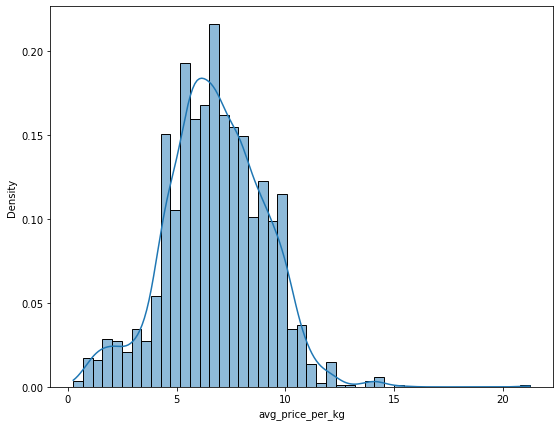

In [40]:
# Histogram plot with a gaussian kernel density estimate for avg_price_per_kg
fig = plt.figure(figsize=(9, 7))
sns.histplot(df_train["avg_price_per_kg"], stat="density", kde=True)

From the graph and statistic values, the response variabel "avg_price_per_kg" has acceptable summary statistic values, skewness and kurtosis. It is close to a noraml distribution. There is some positive skewness present.

### Analyse Time Intervals

Some feature engineering on the date variable was done to get different date formats. Mostly in mind that apples are seasonal fruits and to determine how these seasons influence the price.

In [41]:
# PeriodIndex Pandas function is used to engineer the "Date" column.
df_train["quarter"] = pd.PeriodIndex(df_train["Date"], freq="Q") # Split date into quarters per year
df_train["year_month"] = pd.PeriodIndex(df_train["Date"], freq="M") # Split date into months per year
df_train["month"] = df_train["Date"].dt.month # Extract the month info from the column

In [42]:
# Function to get seasons of year.
def get_season(m):
    """
    Extract the seasons from the date column according their month values.
    
    
    Parameters
    ----------
    m : str
        Column name to use in DataFrame

    Returns
    -------
    value: str
        Corrosponding season name
    
    """
    if m in [12, 1, 2]:
        return "summer"
    if m in [3, 4, 5]:
        return "autumn"
    if m in [6, 7, 8]:
        return "winter"
    return "spring"

In [43]:
# Call function to extract season values and store in dataframe with .apply().
df_train["season"] = df_train["month"].apply(get_season) # Create new column in DataFrame "season"

In [44]:
df_train.sort_values("Date")[["Date", "quarter", "month", "season"]].head()

,Date,quarter,month,season
32221,2019-12-11,2019Q4,12,summer
30171,2019-12-11,2019Q4,12,summer
53893,2019-12-11,2019Q4,12,summer
64177,2019-12-11,2019Q4,12,summer
35634,2019-12-11,2019Q4,12,summer


In [45]:
df_train["season"].value_counts()

winter    827
autumn    605
summer    352
spring    168
Name: season, dtype: int64

Inspect the newly created columns of the date variations and see how they influence the data. It seems that most of the observations were made in the Winter season.

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1952 non-null   object        
 1   Container         1952 non-null   object        
 2   Size_Grade        1952 non-null   object        
 3   Weight_Kg         1952 non-null   float64       
 4   Commodities       1952 non-null   object        
 5   Date              1952 non-null   datetime64[ns]
 6   Low_Price         1952 non-null   float64       
 7   High_Price        1952 non-null   float64       
 8   Sales_Total       1952 non-null   float64       
 9   Total_Qty_Sold    1952 non-null   int64         
 10  Total_Kg_Sold     1952 non-null   float64       
 11  Stock_On_Hand     1952 non-null   int64         
 12  avg_price_per_kg  1952 non-null   float64       
 13  quarter           1952 non-null   period[Q-DEC] 
 14  year_month        1952 

In [47]:
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,quarter,year_month,month,season
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,2020Q3,2020-09,9,spring
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,2020Q2,2020-04,4,autumn
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11,2020Q2,2020-04,4,autumn
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,2020Q2,2020-05,5,autumn
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50,2020Q3,2020-09,9,spring


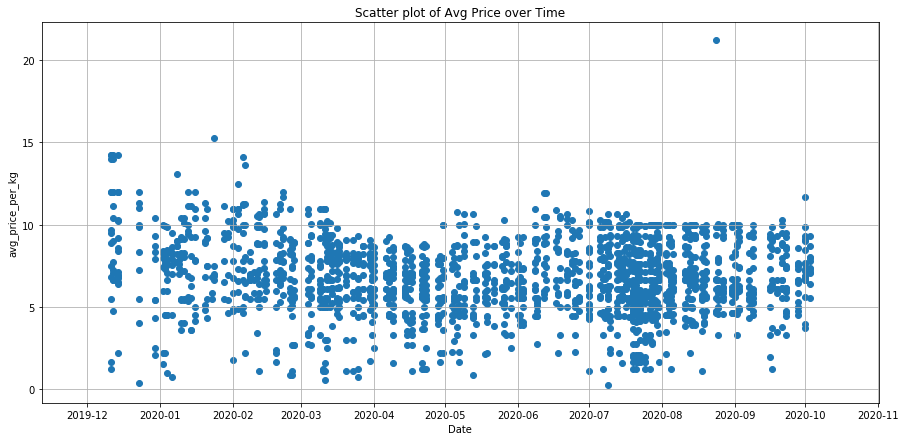

In [48]:
# Scatter plot of the avg price value per each date timestamp.
fig = plt.figure(figsize=(15, 7))
ax = fig.gca()
x = df_train["Date"]
y = df_train["avg_price_per_kg"]
plt.title("Scatter plot of Avg Price over Time")
plt.xlabel("Date")
plt.ylabel("avg_price_per_kg")
plt.scatter(x, y)
plt.grid()
plt.show()

There are 2x possible outliers - the above R15 and R20 observations.

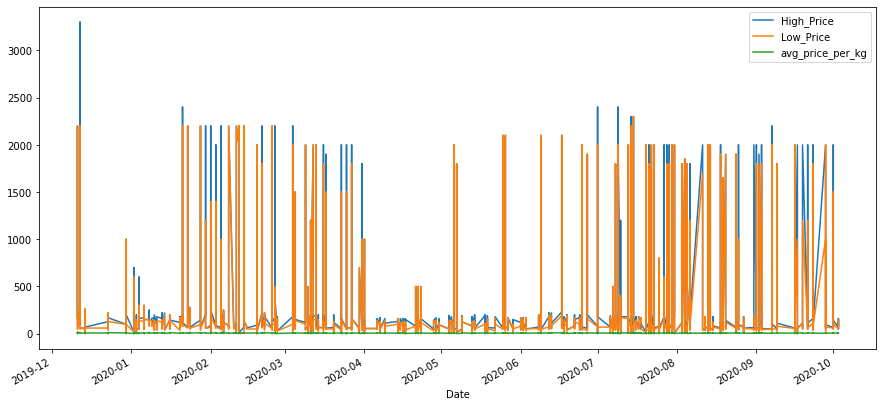

In [49]:
# Plot of the High and Low prices per date timestamp.
temp = df_train[["High_Price", "Low_Price", "avg_price_per_kg"]]
temp.index = df_train["Date"]
temp.plot(figsize=(15, 7))

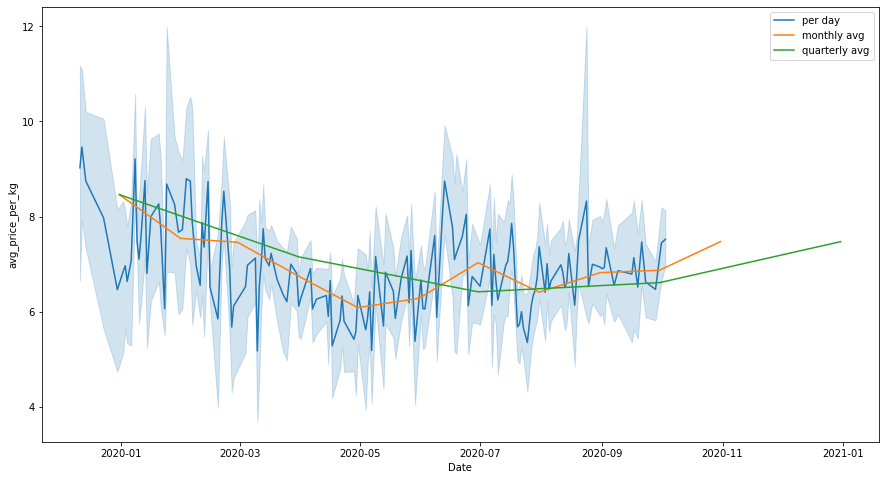

In [50]:
# Combined line graph of the average price for different date formats.
plt.figure(figsize=(15,8))
sns.lineplot(data = temp["avg_price_per_kg"])
resampled = temp["avg_price_per_kg"].resample("M").mean()
sns.lineplot(data = resampled)
resampled = temp["avg_price_per_kg"].resample("Q").mean()
sns.lineplot(data = resampled)
plt.legend(labels=["per day", "monthly avg", "quarterly avg"])

Below are some Box Plots of the different date formats against the average price per kg.

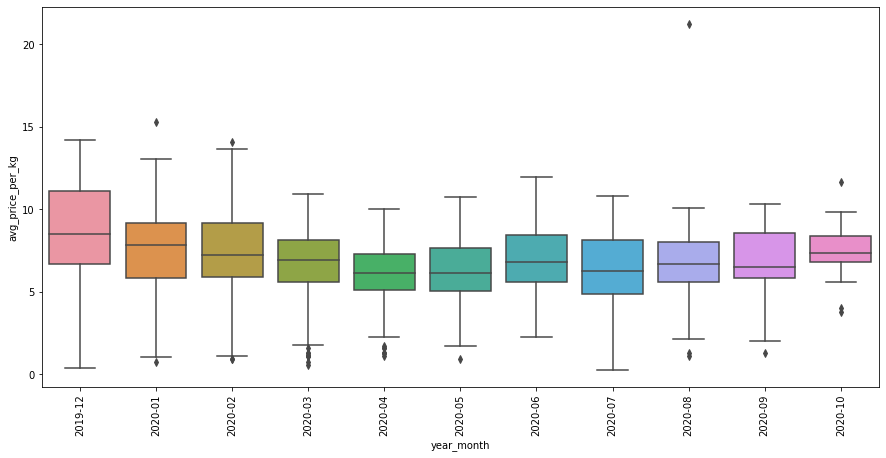

In [51]:
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x="year_month", y="avg_price_per_kg", data=df_train, order=sorted(df_train["year_month"].unique()))
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

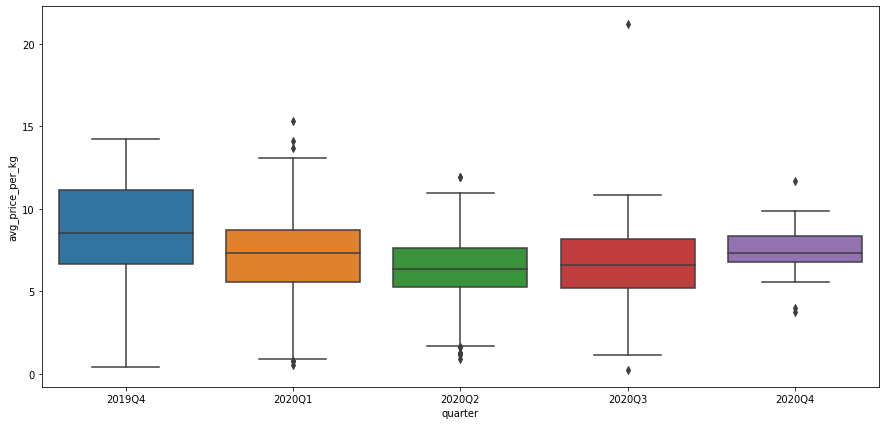

In [52]:
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x ="quarter", y="avg_price_per_kg", data=df_train, order=sorted(df_train["quarter"].unique()))

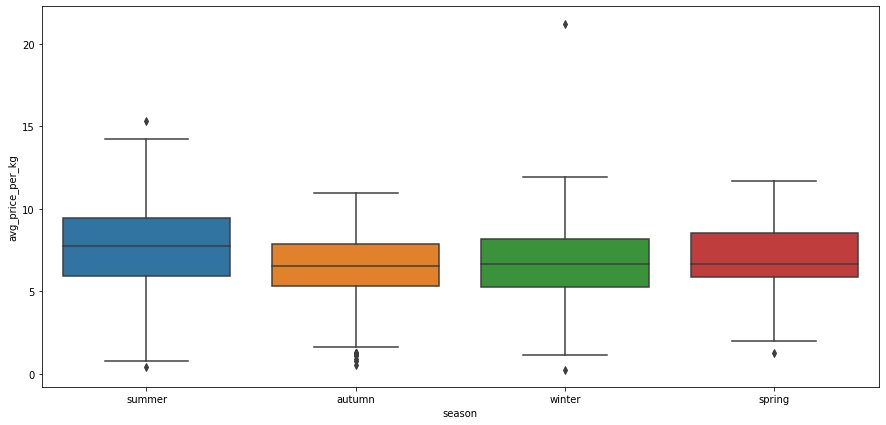

In [53]:
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x="season", y="avg_price_per_kg", data=df_train, order=["summer", "autumn", "winter", "spring"])

The obove confirms that the date of the observations has some influence on the price - the prices change as the seasons changes. This is linked with demand and supply of the apples. The highest average prices occur during the summer months.

### Relationship with Numerical Variables

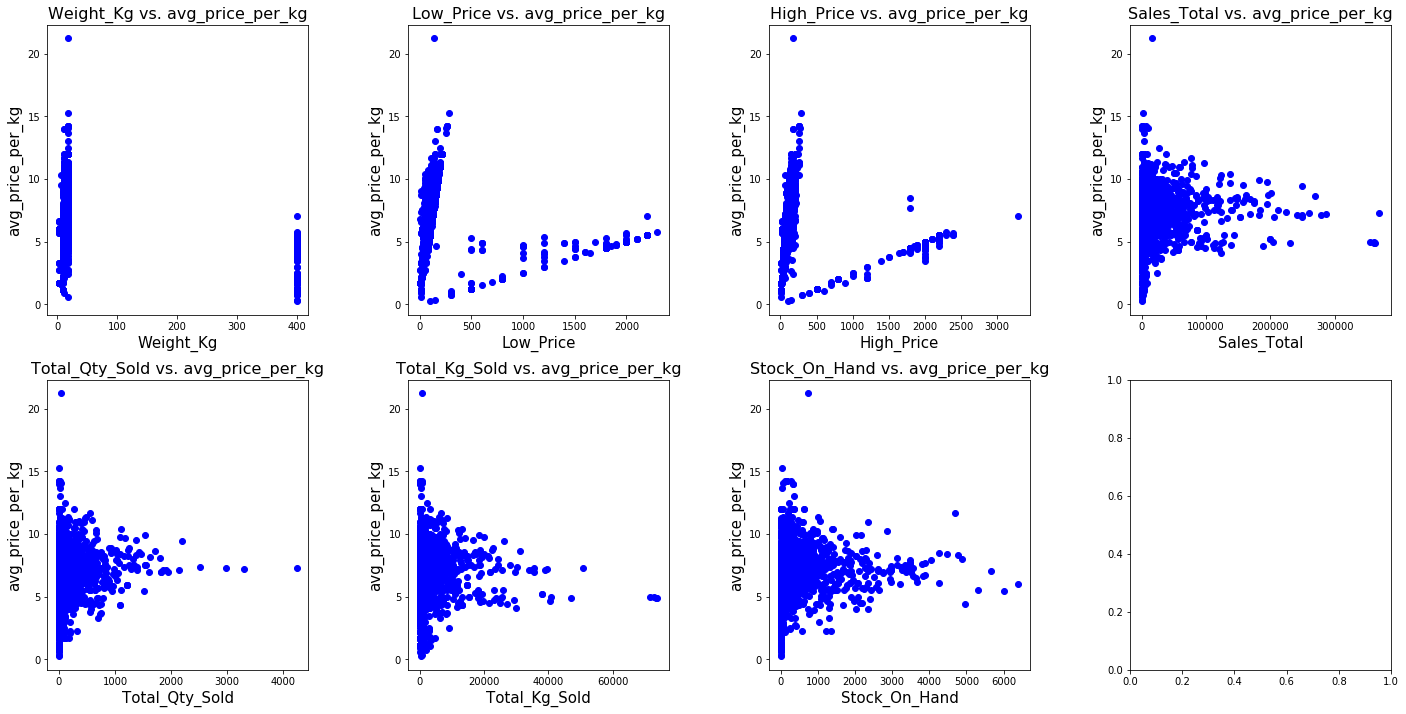

In [54]:
# Create subplot frame for graphs.
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axs = axs.ravel()

# Numeric_col defined again for clarity.
numeric_col = ["Weight_Kg", "Low_Price", "High_Price", "Sales_Total", "Total_Qty_Sold", "Total_Kg_Sold", "Stock_On_Hand"]

# Iterate over the numeric_col entries to scatter plot each variable against the predictor variable.
for index, column in enumerate(numeric_col):
    axs[index].set_title("{} vs. avg_price_per_kg".format(column), fontsize=16)
    axs[index].scatter(x=df_train[column], y=df_train.avg_price_per_kg, color="blue")
    axs[index].set_xlabel("{}".format(column), fontsize=15)
    axs[index].set_ylabel("avg_price_per_kg", fontsize=15)
    
fig.tight_layout(pad=1)

The graphs show that there is some relationship between the variables and the average price per kg - it does not seem to indicate a clear linear relationship.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000233EC886908>,
      dtype=object)

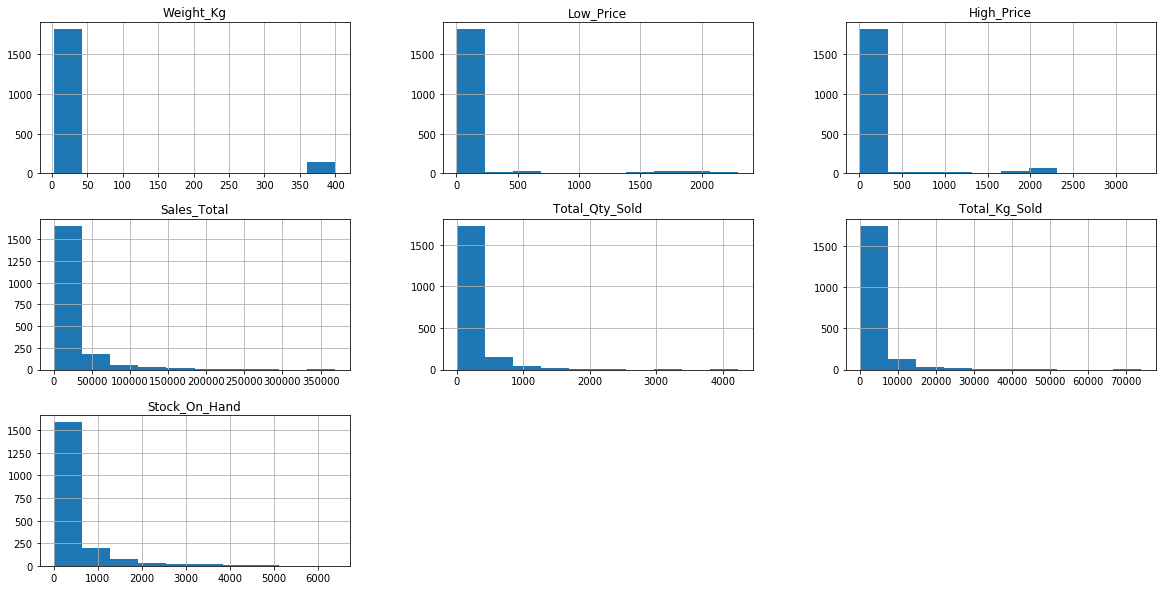

In [55]:
# Histograms to check the distribution of the variables.
df_train[numeric_col].hist(figsize=(20, 10))

The independent variables seem to be skew.

In [56]:
# For clarity the numeric_col variable defined and showed again.
numeric_col = ["Weight_Kg", "Low_Price", "High_Price", "Sales_Total", "Total_Qty_Sold", "Total_Kg_Sold", "Stock_On_Hand"]
numeric_col

['Weight_Kg',
 'Low_Price',
 'High_Price',
 'Sales_Total',
 'Total_Qty_Sold',
 'Total_Kg_Sold',
 'Stock_On_Hand']

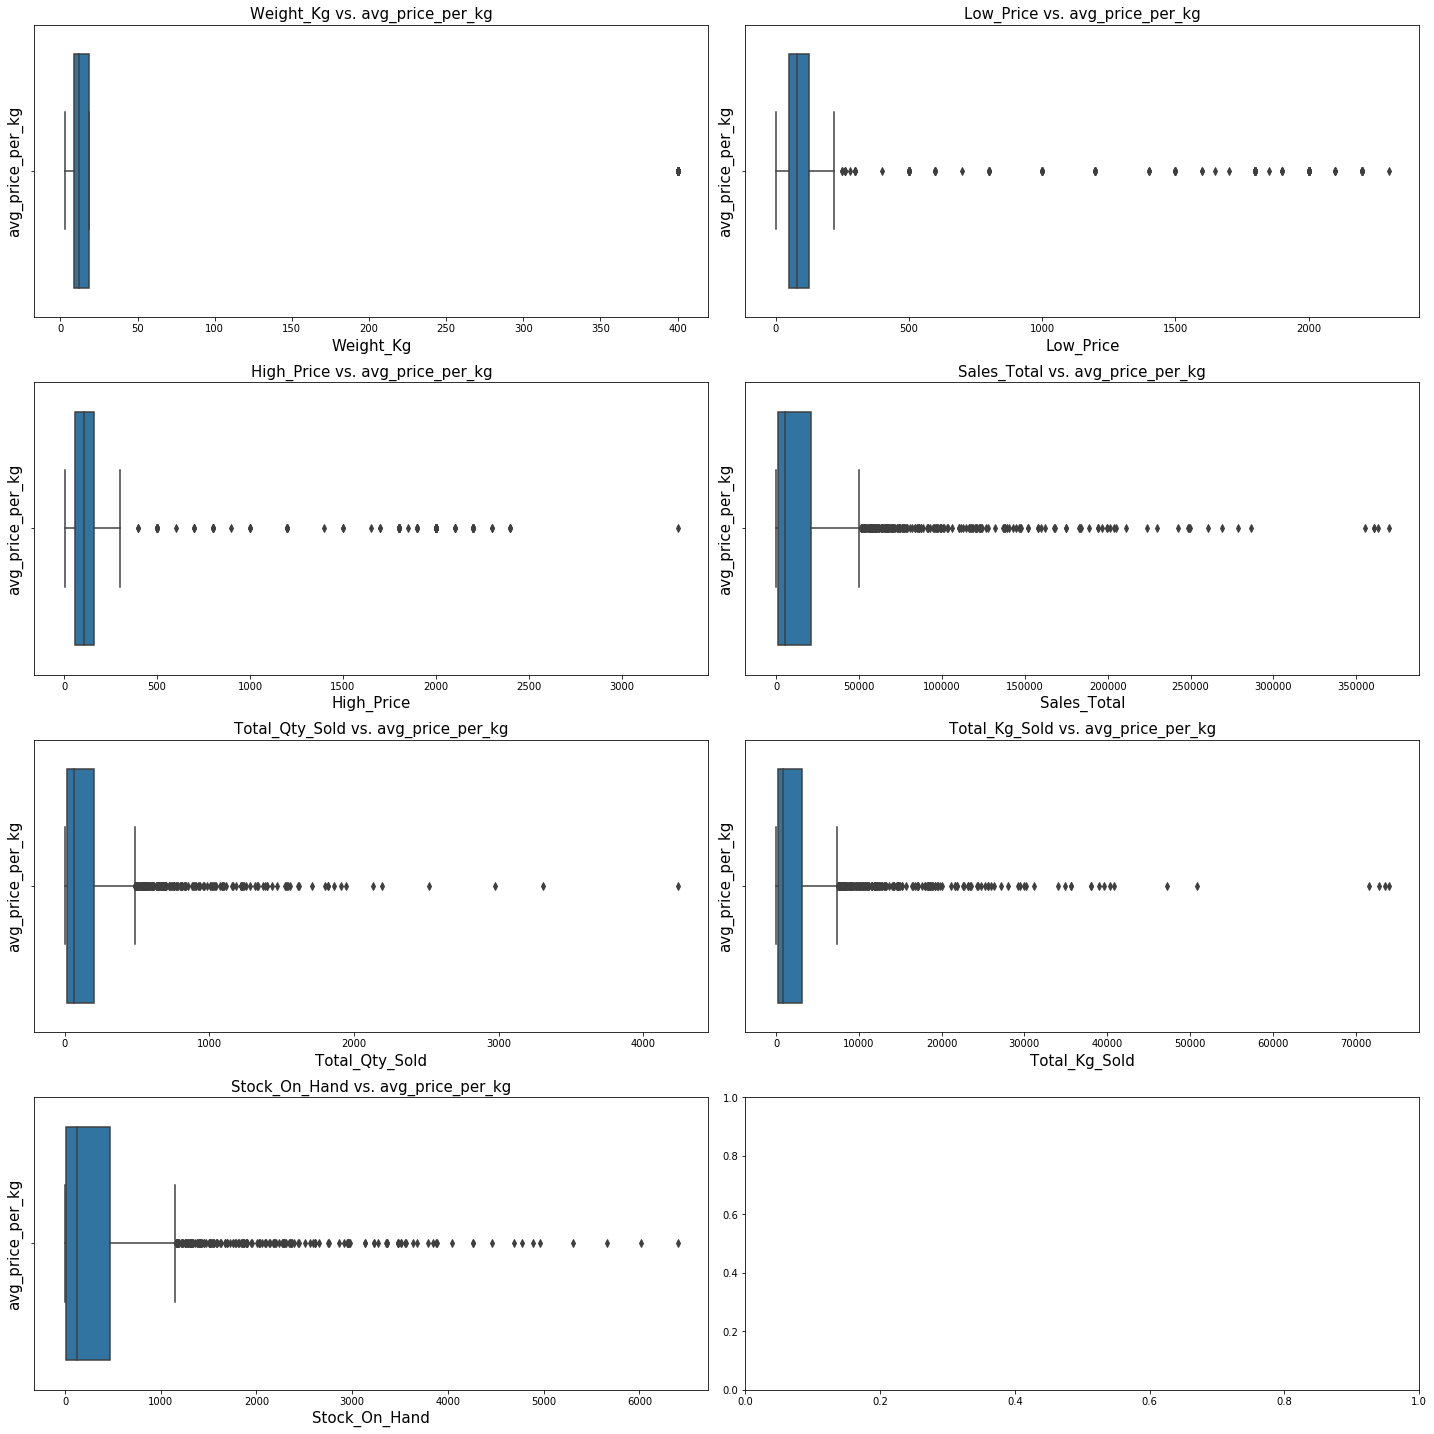

In [57]:
# Create frame for plots
fig, axs = plt.subplots(4, 2, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axs = axs.ravel()

# Numeric_col defined again for clarity.
numeric_col = ["Weight_Kg", "Low_Price", "High_Price", "Sales_Total", "Total_Qty_Sold", "Total_Kg_Sold", "Stock_On_Hand"]

# Iterate over the numeric_col entries for a box plot of each variable against the predictor variable.
for index, column in enumerate(numeric_col):
    axs[index].set_title("{} vs. avg_price_per_kg".format(column), fontsize=15)
    sns.boxplot(x=column, data=df_train, ax=axs[index])
    axs[index].set_xlabel("{}".format(column), fontsize = 15)
    axs[index].set_ylabel("avg_price_per_kg", fontsize = 15)
    
fig.tight_layout(pad=1)

### Relationship with Categorical Variables

For the categorical features box and distributions graphs are plotted. 

In [58]:
# For clarity the categorical_cols variable defined and showed again.
categorical_cols = ["Province", "Container", "Size_Grade"]

In [59]:
# Function to call for box plots.
def plot_boxplt(columns, y_name, df):
    """
    Plot the variables against avg_price_per_kg on box plots with labels.
    
    
    Parameters
    ----------
    columns : list of str
        Column names to use for plots and to iterate
    y_name : str
        Variable to plot against for the summary statistics
    df : Pandas DataFrame 
        DataFrame to use for the observations
    Returns
    -------
    plot: boxplot
        Box plot for each variable in list
    
    """
    # Iterate over the categorical_cols entries for a box plot of each variable against the predictor variable.
    for col in columns: 
        var = col
        pred_var = y_name
        my_order = df.groupby(by=[col])[pred_var].median().sort_values().index # Order by increasing median value
        data_cat = pd.concat([df[pred_var], df[var]], axis=1)
        fig, ax = plt.subplots(figsize=(8, 6))
        fig = sns.boxplot(x=var, y=pred_var, data=data_cat, order=my_order)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

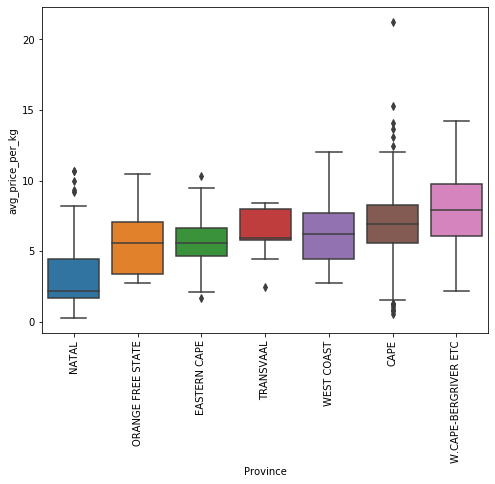

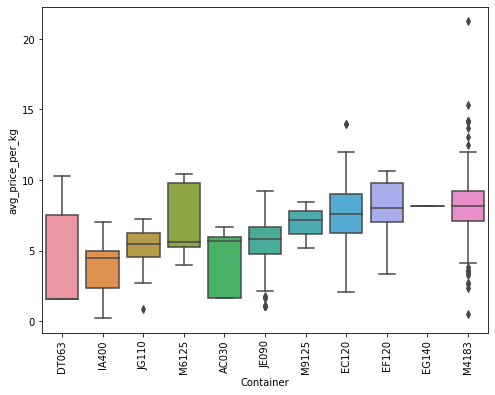

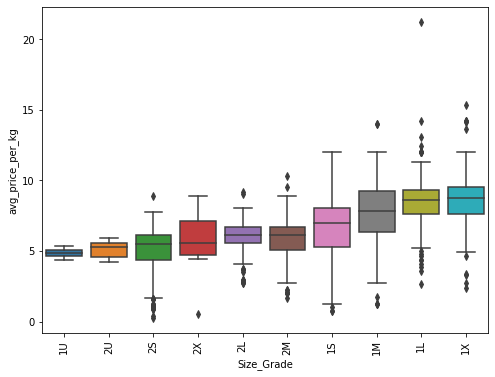

In [60]:
plot_boxplt(categorical_cols, "avg_price_per_kg", df_train)

From the Box Plots it is clear that the Cape region has the highest average price per kg values compared to the other provinces. Whereas Natal has the lowest values. The plots also show some outliers present per province. <br>
The M4183 container seems to have the highest average values as well and the size grade 1X. There is some relationship between the grade and size of the apples.

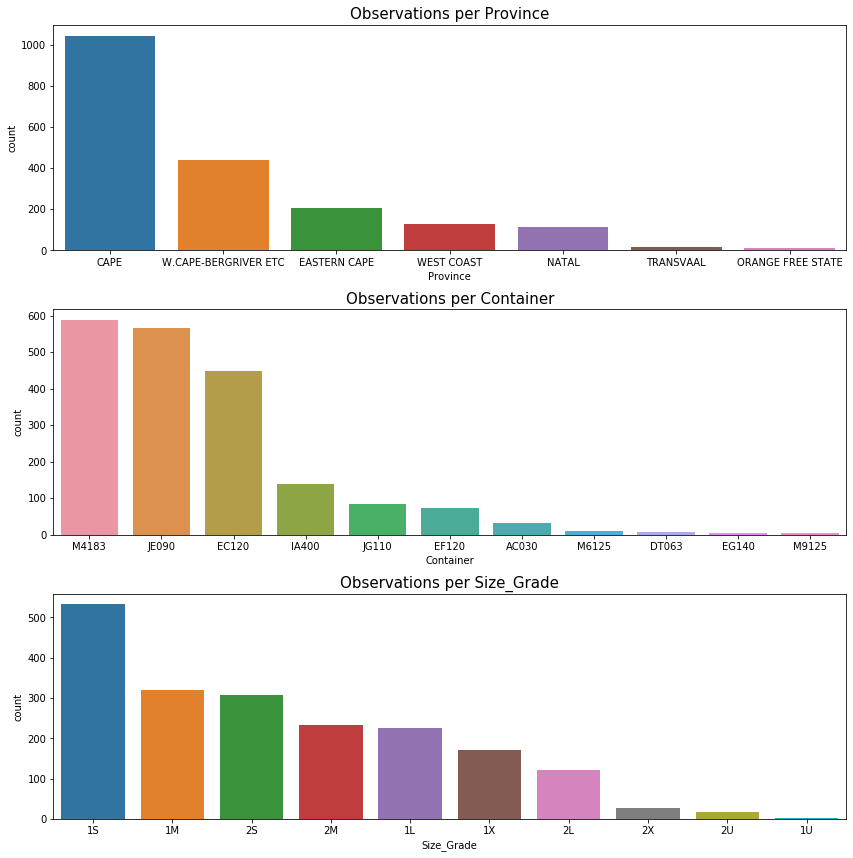

In [61]:
# Create subplot frame for the Bar graphs.
fig, axs = plt.subplots(3, 1, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axs = axs.ravel()

# Iterate over the categorical_cols entries for a box plot of each variable against the predictor variable.
for index, column in enumerate(categorical_cols):
    axs[index].set_title("Observations per {}".format(column), fontsize = 15)
    sns.countplot(ax=axs[index], x=column, data=df_train,  order=df_train[column].value_counts().index)
     
fig.tight_layout(pad=1)

This again confrims that some of the category groups contain few observations. These can possibly be grouped together.

## 4.4 Multivariate Analysis - Non-graphical

The Pearsons correlation - `df.corr()` is used to check the correlations between the columns and focusing on the correlation of each variable with the predictor variable.

In [62]:
df_train.drop("month", axis=1).corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000


In [63]:
# Import the required packages to calculate the VIF values.
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df = df_train[numeric_col]

X = add_constant(df)

pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

const              1.840553
Weight_Kg          5.930872
Low_Price          9.280307
High_Price        14.574768
Sales_Total       27.958520
Total_Qty_Sold     4.085997
Total_Kg_Sold     21.304289
Stock_On_Hand      1.205649
dtype: float64

For the VIF values of 5 and above, more insight is requried to determine if these should be dropped during the training of the model. It will be considered at a later stage when the data variables are processed more and better conclusions can be drawn into which variables should be used.

## 4.5 Multivariate Analysis - Visual Representations

The correlation between predictor variables are considered and displayed graphically. These plots consists of a heat map and pair plots.

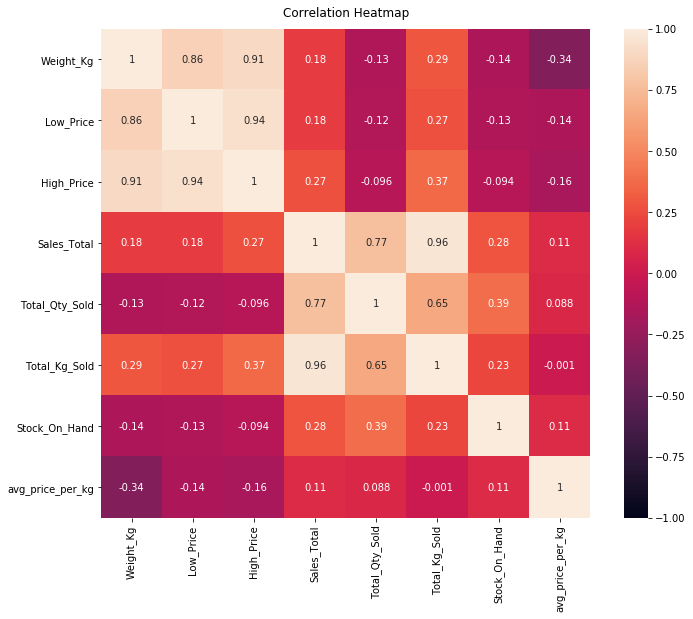

In [64]:
# Plot the heat map to show correlation.
fig, axs = plt.subplots(figsize=(12,9))
heatmap = sns.heatmap(df_train.drop("month", axis=1).corr(), vmin=-1, vmax=1, square=True, annot=True)
heatmap.set_title("Correlation Heatmap", fontdict={"fontsize":12}, pad=12);

There is some multicolinearity present between the variables and should be investigated before using the variable in training the model. Low Price and High Price indicates a strong correlation between each other and also the Weight_Kg variable with each of them.


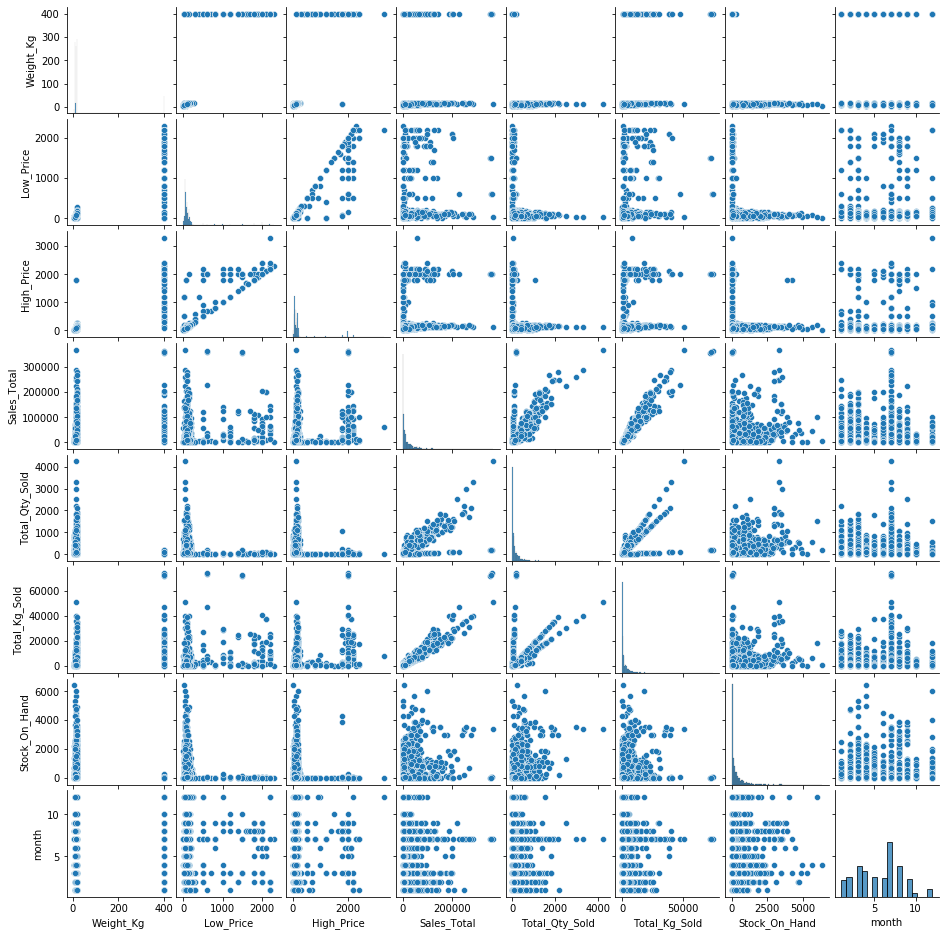

In [65]:
# Use seaborn pairplot to show the scatter plots relationship between variables.
from seaborn import pairplot
g = pairplot(df_train.drop("avg_price_per_kg", axis="columns"))
g.fig.set_size_inches(13, 13)

# 5. More Cleaning Data
After the first EDA investigation it is required that some extra variable cleaning steps are required to gain more insights.

## 5.1 Dummy Variable Encoding
To transform the categorical features to numerical data that can be used in the regression models, dummy variable encoding is used. This is done with `pandas` method called `get_dummies`.

In [66]:
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,quarter,year_month,month,season
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,2020Q3,2020-09,9,spring
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,2020Q2,2020-04,4,autumn
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11,2020Q2,2020-04,4,autumn
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,2020Q2,2020-05,5,autumn
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50,2020Q3,2020-09,9,spring


In [67]:
df_train["Province"].unique()

array(['CAPE', 'W.CAPE-BERGRIVER ETC', 'EASTERN CAPE', 'NATAL',
       'WEST COAST', 'TRANSVAAL', 'ORANGE FREE STATE'], dtype=object)

In [68]:
df_train["Container"].unique()

array(['M4183', 'JG110', 'JE090', 'IA400', 'EC120', 'AC030', 'M6125',
       'EF120', 'DT063', 'M9125', 'EG140'], dtype=object)

In [69]:
df_train["Size_Grade"].unique()

array(['1L', '2M', '2S', '1S', '1M', '1X', '2L', '2U', '2X', '1U'],
      dtype=object)

In [70]:
# Select columns to create dummy variables from.
dummy_columns = ["Province", "Container", "Size_Grade"]

In [71]:
df_dummies = pd.get_dummies(df_train, prefix="dummy", prefix_sep="_", columns=dummy_columns, drop_first=False)

In [72]:
# Reorder to place avg_price_per_kg in the last column.
col_dum_titl = [col for col in df_dummies.columns if col != "avg_price_per_kg"] + ["avg_price_per_kg"]
df_dummies = df_dummies.reindex(columns=col_dum_titl)

In [73]:
# Ensure that all the column names have underscores instead of whitespaces.
df_dummies.columns = [col.replace(" ","_") for col in df_dummies.columns] 

In [74]:
df_dummies.head()

,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,quarter,year_month,month,season,dummy_CAPE,dummy_EASTERN_CAPE,dummy_NATAL,dummy_ORANGE_FREE_STATE,dummy_TRANSVAAL,dummy_W.CAPE-BERGRIVER_ETC,dummy_WEST_COAST,dummy_AC030,dummy_DT063,dummy_EC120,dummy_EF120,dummy_EG140,dummy_IA400,dummy_JE090,dummy_JG110,dummy_M4183,dummy_M6125,dummy_M9125,dummy_1L,dummy_1M,dummy_1S,dummy_1U,dummy_1X,dummy_2L,dummy_2M,dummy_2S,dummy_2U,dummy_2X,avg_price_per_kg
1,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,2020Q3,2020-09,9,spring,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,8.51
7,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,2020Q2,2020-04,4,autumn,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,4.55
24,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,2020Q2,2020-04,4,autumn,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6.11
40,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,2020Q2,2020-05,5,autumn,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,4.51
69,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,2020Q3,2020-09,9,spring,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4.50


In [75]:
df_dummies.shape

(1952, 42)

In [76]:
df_dummies.columns

Index(['Weight_Kg', 'Commodities', 'Date', 'Low_Price', 'High_Price',
       'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand',
       'quarter', 'year_month', 'month', 'season', 'dummy_CAPE',
       'dummy_EASTERN_CAPE', 'dummy_NATAL', 'dummy_ORANGE_FREE_STATE',
       'dummy_TRANSVAAL', 'dummy_W.CAPE-BERGRIVER_ETC', 'dummy_WEST_COAST',
       'dummy_AC030', 'dummy_DT063', 'dummy_EC120', 'dummy_EF120',
       'dummy_EG140', 'dummy_IA400', 'dummy_JE090', 'dummy_JG110',
       'dummy_M4183', 'dummy_M6125', 'dummy_M9125', 'dummy_1L', 'dummy_1M',
       'dummy_1S', 'dummy_1U', 'dummy_1X', 'dummy_2L', 'dummy_2M', 'dummy_2S',
       'dummy_2U', 'dummy_2X', 'avg_price_per_kg'],
      dtype='object')

There are now 41 variable columns to predict our dependent variable `avg_price_per_kg`.
<br>The coloumns that will be dropped due to the `pd.get_dummies()` function parameter `drop_first = True` are: 
<br>Dropped columns = Cape, AC030, 1L

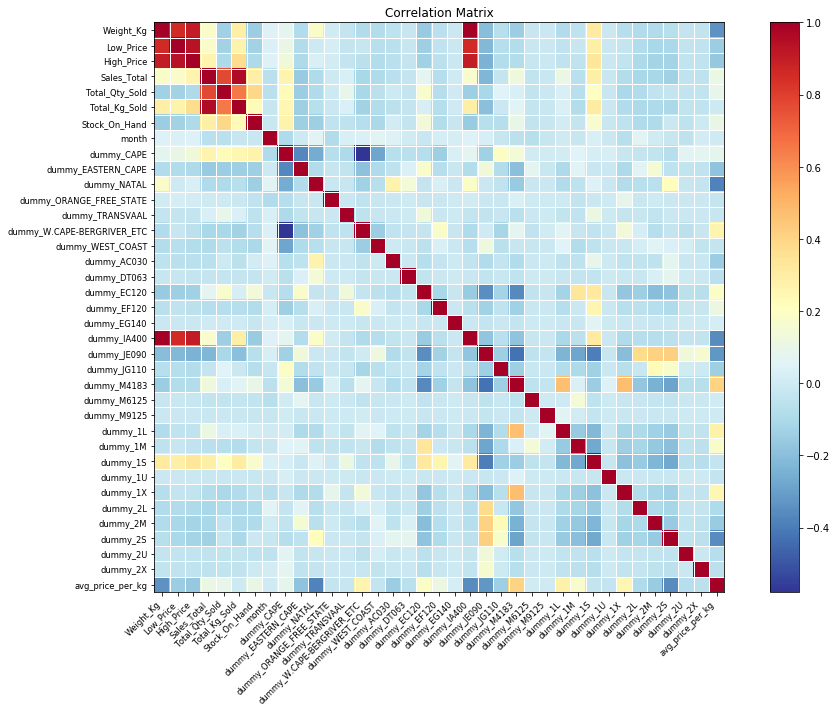

In [77]:
# Plot the correlation matrix heatmap to investigate.
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    plot_corr(df_dummies.corr(), xnames = df_dummies.corr().columns)

From the correlations there are some dummy variables that are not correlated and therefore not very usefull for the model. But there are some variables that are strongly correlated with each other wich will cause multicollinearity issues.

## 5.2 Scaling
Scaling is required to be able to compare the variables values with each other and is also a crucial step during Lasso and Ridge Regression Models.

### Standardisation

Z-score standardisation is used and is fairly robust to outliers. We need to determine if the magnitudes of the coefficients are dependent on the strength of the relantionship between the predictor variables and the output variable - not becuase of difference in measured units.

In [78]:
X_num_df = df_train[["Weight_Kg", "Low_Price", "High_Price", "Sales_Total", 
                 "Total_Qty_Sold", "Total_Kg_Sold", "Stock_On_Hand", "avg_price_per_kg"]]

In [79]:
X_num_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [80]:
# Import the StandardScaler funciton to scale the variables with standardisation.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num_df)
X_standardise = pd.DataFrame(X_scaled, columns=X_num_df.columns)

In [81]:
X_standardise.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,-0.222433,-0.065087,-0.105317,0.811807,0.510117,0.511073,0.571070,0.770008
1,-0.295704,-0.332855,-0.382175,-0.103950,0.471248,0.091837,-0.563874,-0.991426
2,-0.315779,-0.319467,-0.370639,-0.488870,-0.506948,-0.459029,1.515476,-0.297528
3,-0.222433,-0.252525,-0.220674,0.306871,0.691504,0.679187,0.047781,-1.009219
4,3.608756,4.353082,3.655338,-0.468098,-0.562012,-0.419986,-0.561112,-1.013667


# 6. Revisit EDA

After the First EDA and the cleaning steps it is required to revisit the EDA of the data for more insight to the data. Especially focusing on the following to find relationships between them.
- Province
- Container
- Size_grade
- Weight_Kg
- Outliers

In [82]:
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,quarter,year_month,month,season
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,2020Q3,2020-09,9,spring
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,2020Q2,2020-04,4,autumn
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11,2020Q2,2020-04,4,autumn
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,2020Q2,2020-05,5,autumn
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50,2020Q3,2020-09,9,spring


C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Province vs avg_price_per_kg')

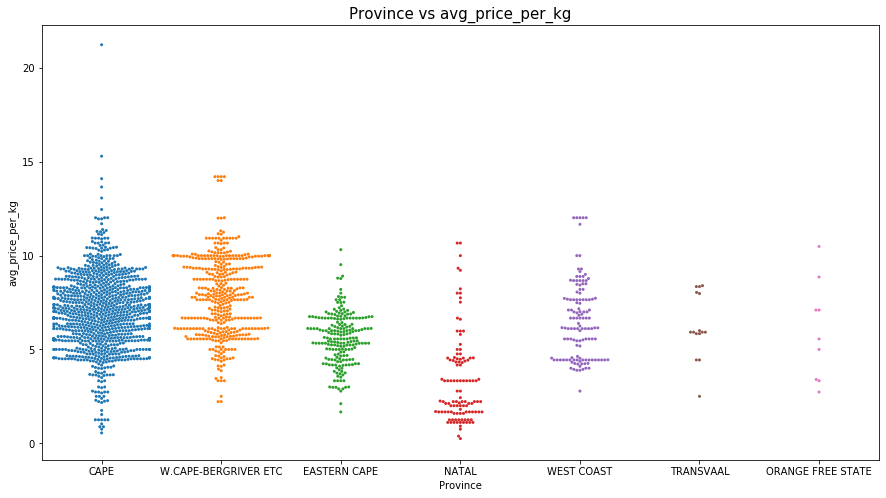

In [83]:
plt.figure(figsize=(15,8))
sns.swarmplot(x="Province", y="avg_price_per_kg", data=df_train, size=3)
plt.title("Province vs avg_price_per_kg", size=15)

C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Container vs avg_price_per_kg')

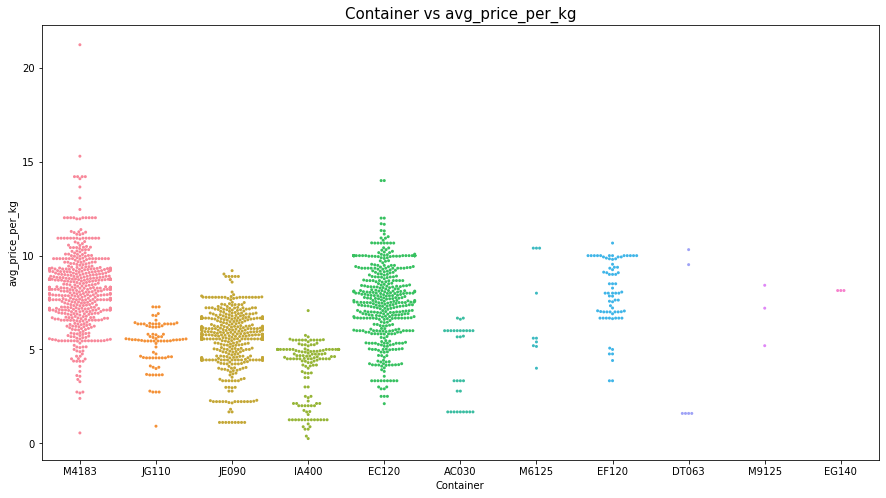

In [84]:
plt.figure(figsize=(15,8))
sns.swarmplot(x="Container", y="avg_price_per_kg", data=df_train, size=3)
plt.title("Container vs avg_price_per_kg", size=15)

C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Size_Grade vs avg_price_per_kg')

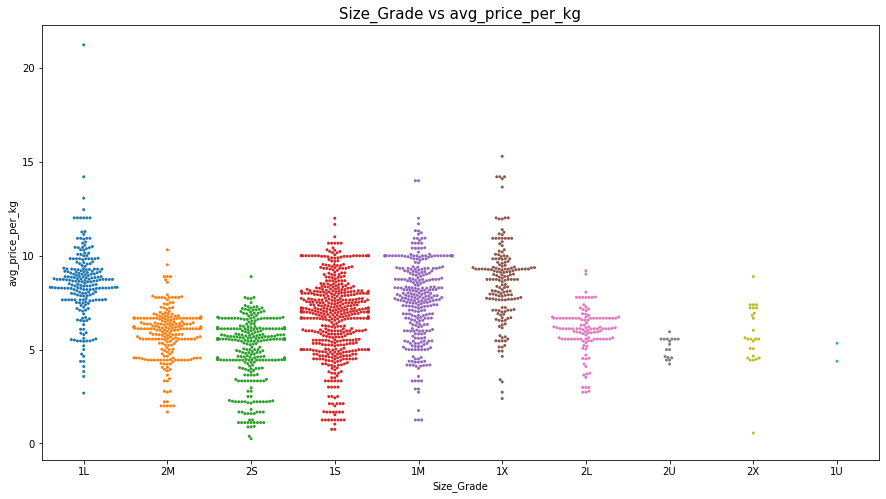

In [85]:
plt.figure(figsize=(15,8))
sns.swarmplot(x="Size_Grade", y="avg_price_per_kg", data=df_train, size=3)
plt.title("Size_Grade vs avg_price_per_kg", size=15)

## 6.1 Container Variable

C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Container vs avg_price_per_kg')

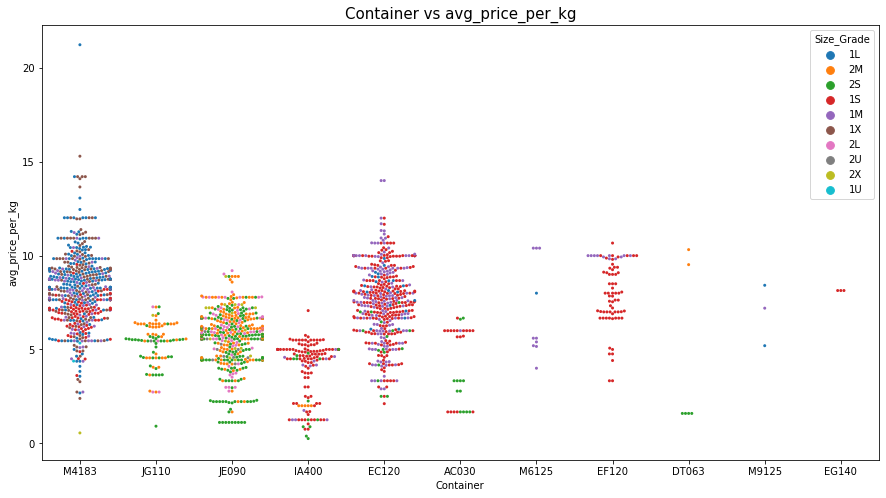

In [86]:
plt.figure(figsize=(15,8))
sns.swarmplot(x="Container", y="avg_price_per_kg", hue="Size_Grade", data=df_train, size=3)
plt.title("Container vs avg_price_per_kg", size=15)

C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Container vs avg_price_per_kg')

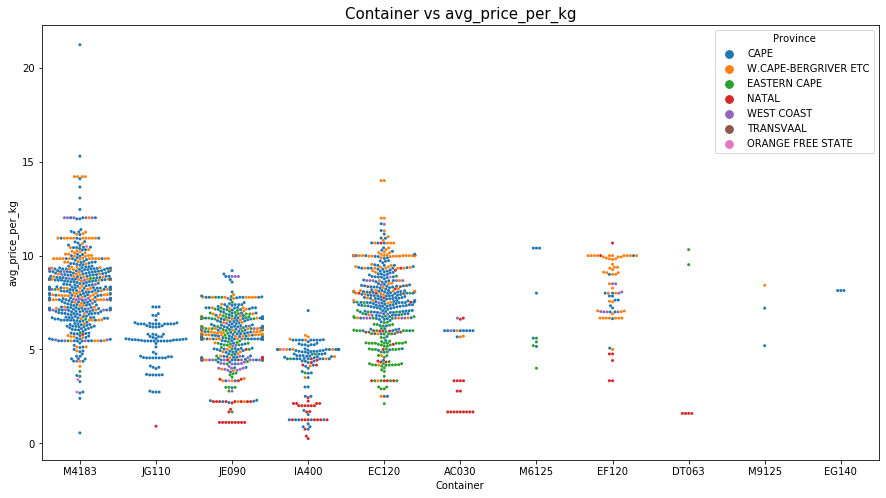

In [87]:
plt.figure(figsize=(15,8))
sns.swarmplot(x="Container", y="avg_price_per_kg", hue="Province", data=df_train, size=3)
plt.title("Container vs avg_price_per_kg", size=15)

## 6.2 Province Variable

C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Province vs avg_price_per_kg')

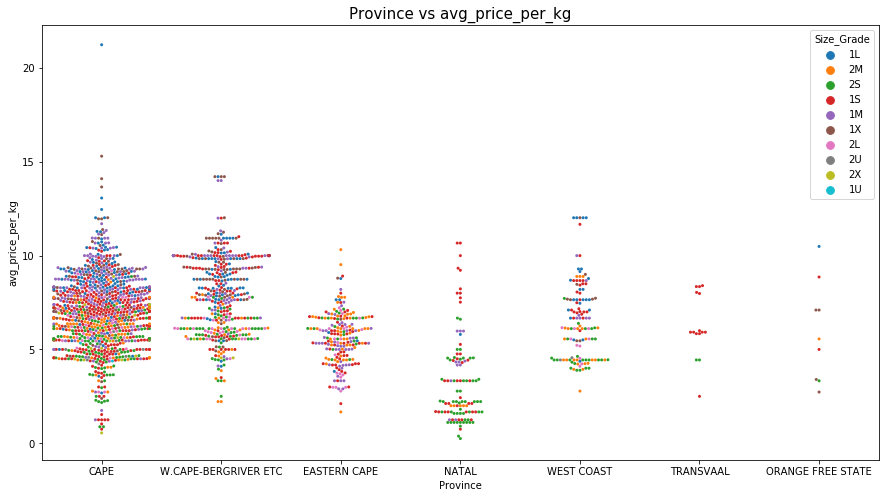

In [89]:
plt.figure(figsize=(15,8))
sns.swarmplot(x="Province", y="avg_price_per_kg", hue="Size_Grade", data=df_train, size=3)
plt.title("Province vs avg_price_per_kg", size=15)

C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Province vs avg_price_per_kg')

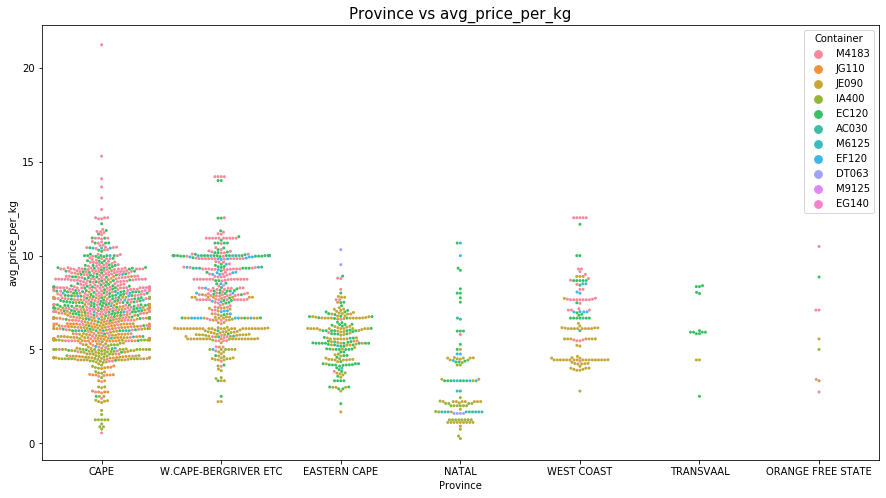

In [90]:
plt.figure(figsize=(15,8))
sns.swarmplot(x="Province", y="avg_price_per_kg", hue="Container", data=df_train, size=3)
plt.title("Province vs avg_price_per_kg", size=15)

## 6.3 Size_Grade Variable

C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Size_Grade vs avg_price_per_kg')

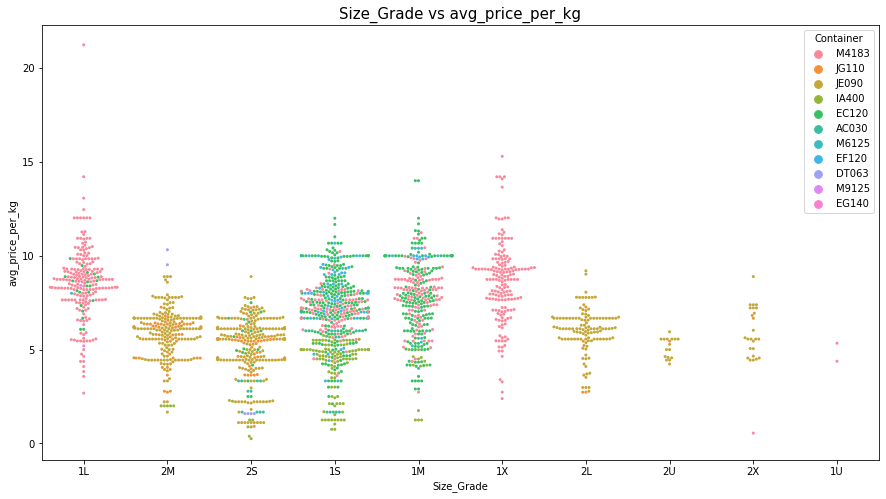

In [91]:
plt.figure(figsize=(15,8))
sns.swarmplot(x="Size_Grade", y="avg_price_per_kg", hue="Container", data=df_train, size=3)
plt.title("Size_Grade vs avg_price_per_kg", size=15)

C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Size_Grade vs avg_price_per_kg')

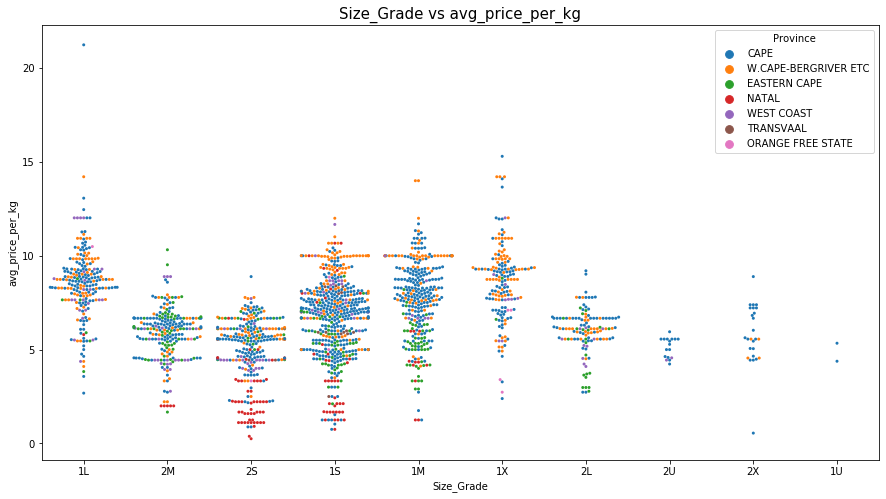

In [92]:
plt.figure(figsize=(15,8))
sns.swarmplot(x="Size_Grade", y="avg_price_per_kg", hue="Province", data=df_train, size=3)
plt.title("Size_Grade vs avg_price_per_kg", size=15)

C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.9% of the points

Text(0.5, 1.0, 'Size_Grade vs Container')

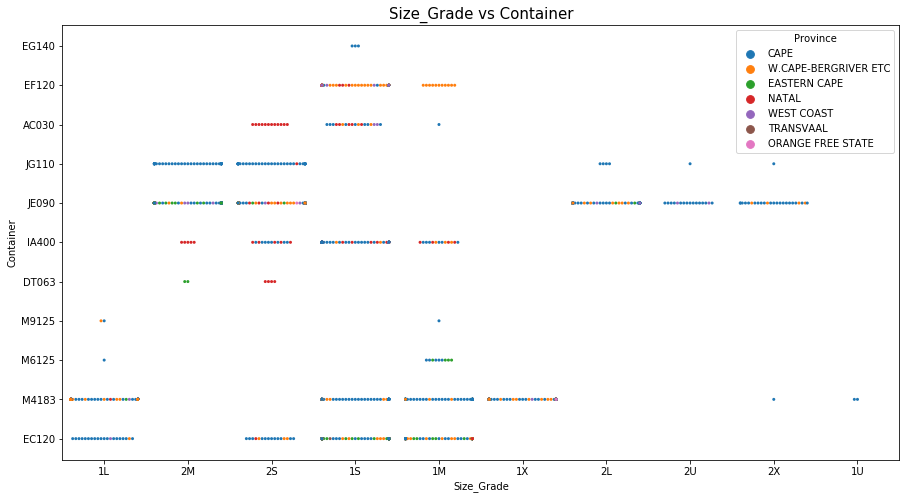

In [93]:
plt.figure(figsize=(15,8))
sns.swarmplot(x="Size_Grade", y="Container", hue="Province", data=df_train, size=3)
plt.title("Size_Grade vs Container", size=15)

## Split the size and grade

In [94]:
# Function to split Size_Grade into two columns.
def split_sizegrade(df, column):
    """
    Extract the size and grade individually from the Size_Grade column and 
    return new columns of size and grade in DataFrame.
    
    
    Parameters
    ----------
    df : DataFrame
        Input DataFrame
    column : str
        Column name to split size and grade
    Returns
    -------
    df: DataFrame
        Altered DataFrame with 2x new columns and dropped original column
        
    """
    
    df = df.copy()
    df["grade"] = df[column].apply(lambda x: "A" if "1" in x else "B") # Replace grade values with A and B in DataFrame
    
    # Second function to change size values to L, M, S, X or U and store in new column "size" in DataFrame.
    def get_size(v):
        if "l" in v.lower():
            return "L"
        if "m" in v.lower():
            return "M"
        if "s" in v.lower():
            return "S"
        if "x" in v.lower():
            return "X"
        return "U"
    
    df["size"] = df[column].apply(get_size) # Call the function to populate the column
    df = df.drop(column, axis=1)
    return df # Return new DataFrame with 2x extra columns

In [97]:
test = split_sizegrade(df_train, "Size_Grade")

Text(0.5, 1.0, 'Size vs avg_price_per_kg')

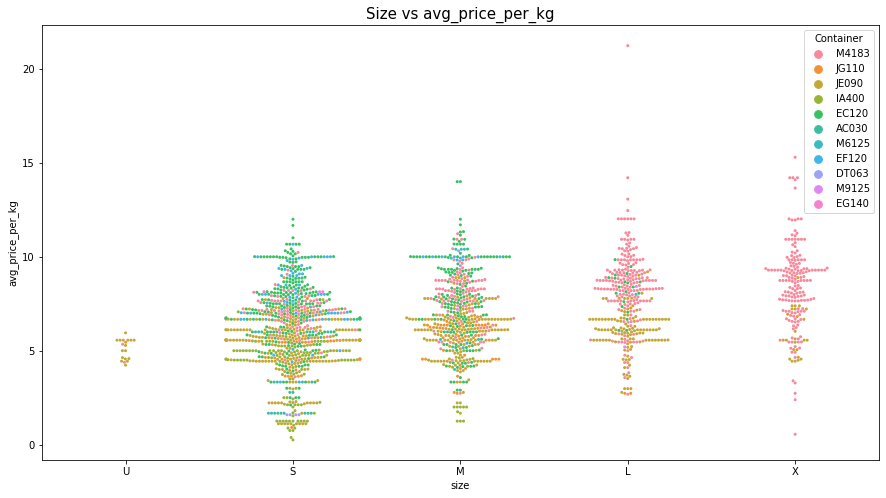

In [98]:
plt.figure(figsize=(15,8))
sns.swarmplot(x="size", y="avg_price_per_kg", hue='Container', data=test, size=3, order=["U", "S", "M", "L", "X"])
plt.title("Size vs avg_price_per_kg", size=15)

Text(0.5, 1.0, 'Grade vs avg_price_per_kg')

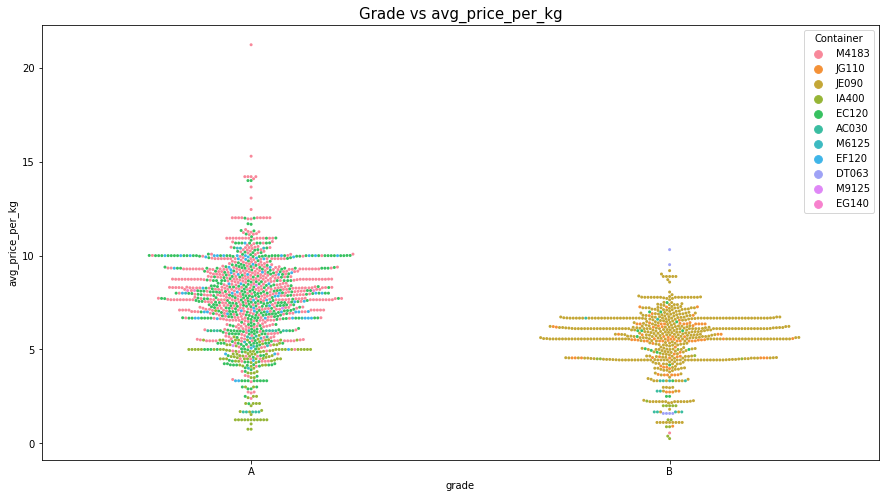

In [99]:
plt.figure(figsize=(15,8))
sns.swarmplot(x="grade", y="avg_price_per_kg", hue='Container', data=test, size=3)
plt.title("Grade vs avg_price_per_kg", size=15)

## 6.4 Weight_Kg Variable

C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\leon1\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Weight_Kg vs avg_price_per_kg')

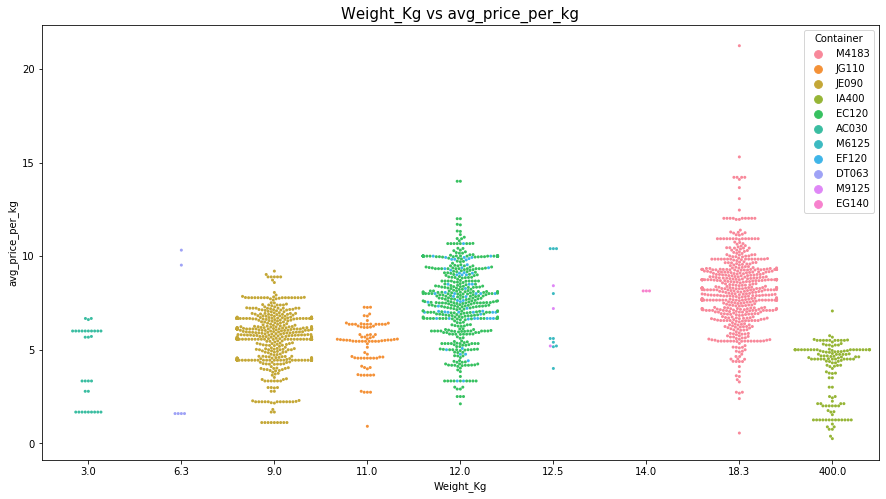

In [100]:
plt.figure(figsize=(15,8))
sns.swarmplot(x="Weight_Kg", y="avg_price_per_kg", hue='Container', data=df_train, size=3)
plt.title("Weight_Kg vs avg_price_per_kg", size=15)

In [101]:
# Group the values with the function into 2x categories.
def num_to_cat_thres(df, column, thres):
    """
    Extract the weight value and group the values into Low or High
    according to given threshold value and making it a categorical variable.
    
    
    Parameters
    ----------
    df : DataFrame
        Input DataFrame
    column : str
        Column name to convert value to categorical Low or High
    thres : int, float
        Value at which to split weights into low or high
    Returns
    -------
    df: DataFrame
        Altered DataFrame with categorical feature
        
    """
    df = df.copy()
    df[column] = df[column].apply(lambda x: f"{column}_low" if x > thres else f"{column}_high")
    return df

In [102]:
test = num_to_cat_thres(df_train, "Weight_Kg", 200)

Text(0.5, 1.0, 'Low_Price vs avg_price_per_kg by Weight Class')

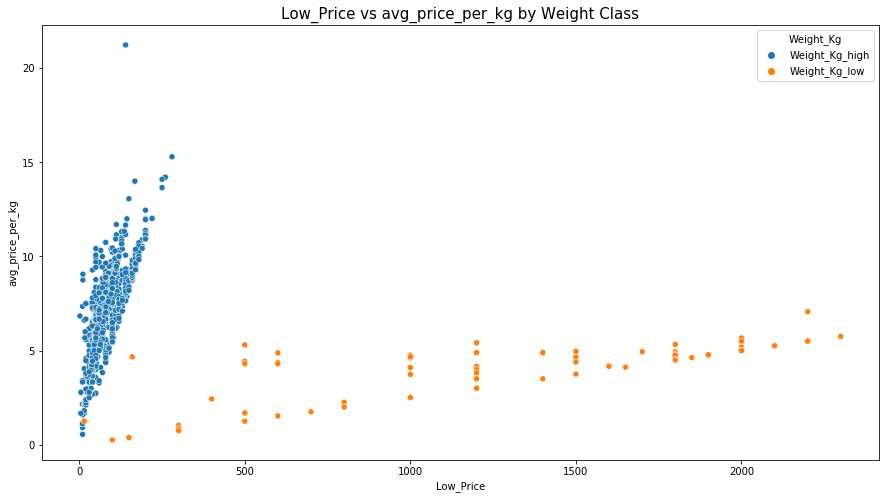

In [103]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Low_Price", y="avg_price_per_kg", data=test, hue="Weight_Kg")
plt.title("Low_Price vs avg_price_per_kg by Weight Class", size=15)

Text(0.5, 1.0, 'High_Price vs avg_price_per_kg by Weight Class')

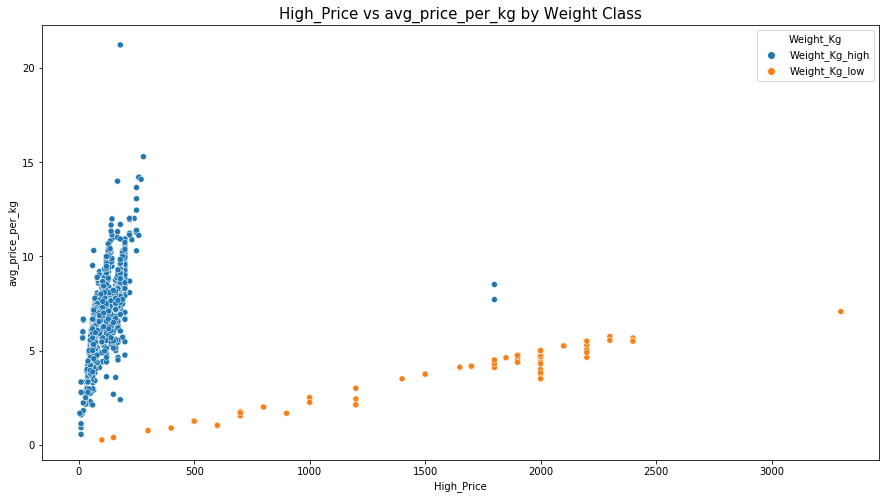

In [104]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="High_Price", y="avg_price_per_kg", data=test, hue="Weight_Kg")
plt.title("High_Price vs avg_price_per_kg by Weight Class", size=15)

In [105]:
df_train["Weight_Kg"].unique()

array([ 18.3,  11. ,   9. , 400. ,  12. ,   3. ,  12.5,   6.3,  14. ])

In [106]:
# Convert numeric column to categorical column.
def num_to_cat(df, column):
    """
    Convert each value in column from numerical to categorical.
    
    
    Parameters
    ----------
    df : DataFrame
        Input DataFrame
    column : str
        Column name to convert value to categorical
    Returns
    -------
    df: DataFrame
        Altered DataFrame with categorical feature
        
    """
    
    df = df.copy()
    df[column] = df[column].astype(str)
    df[column] = df[column].apply(lambda x: f"{column}_{x}")
    return df

In [107]:
test = num_to_cat(df_train, 'Weight_Kg')

Text(0.5, 1.0, 'Low_Price vs avg_price_per_kg by Weight Class')

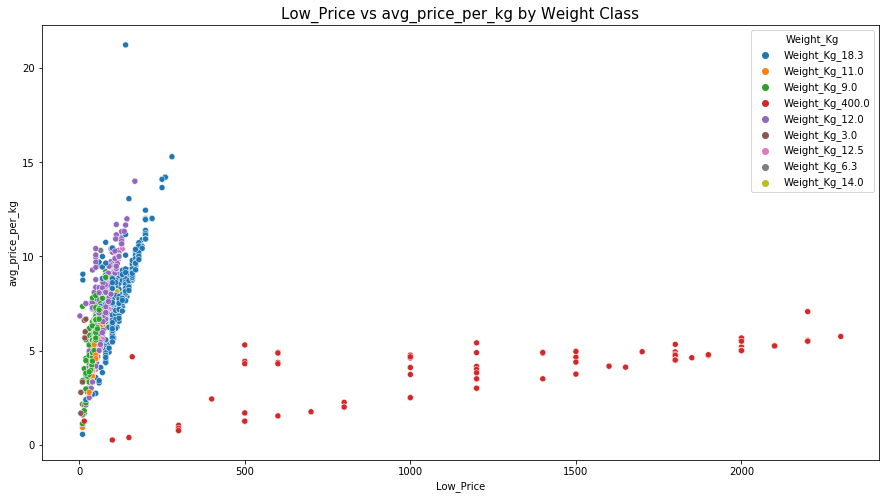

In [108]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Low_Price", y="avg_price_per_kg", data=test, hue="Weight_Kg")
plt.title("Low_Price vs avg_price_per_kg by Weight Class", size=15)

Text(0.5, 1.0, 'High_Price vs avg_price_per_kg by Weight Class')

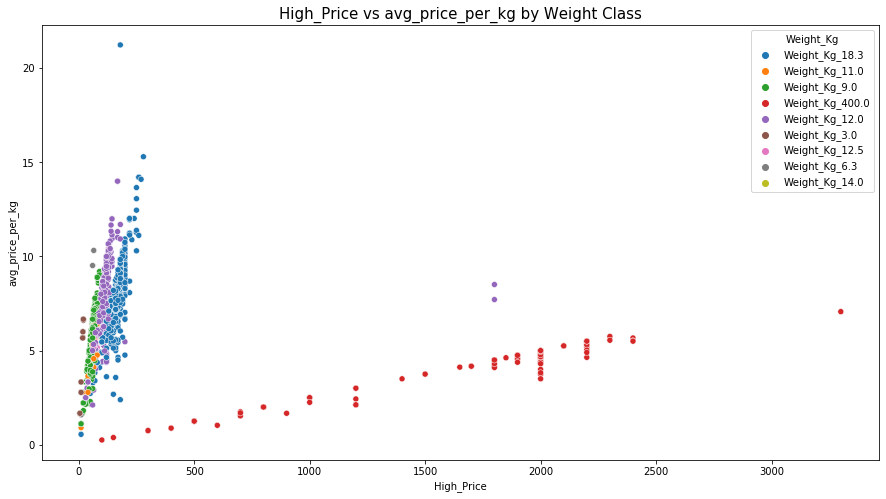

In [109]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="High_Price", y="avg_price_per_kg", data=test, hue="Weight_Kg")
plt.title("High_Price vs avg_price_per_kg by Weight Class", size=15)

## 6.5 Outliers

The outliers causes the model to not fit properly and distorts the fitting process. To deal witht the outliers they are selected on standard deviation from the mean value and then removed. <br>From Kurtosis the following numeric variables have outliers:<br>
- Weight_Kg           
- Low_Price
- High_Price
- Sales_Total
- Total_Qty_Sold
- Total_Kg_Sold
- Stock_On_Hand

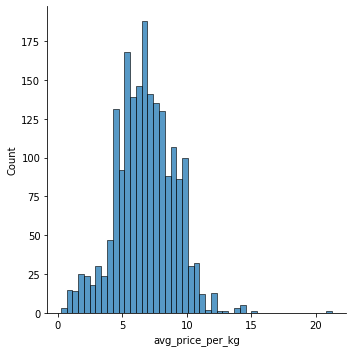

In [110]:
sns.displot(df_train['avg_price_per_kg'])

In [111]:
df_train[df_train["avg_price_per_kg"] > 15]

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,quarter,year_month,month,season
1228,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-08-24,140.0,180.0,15160.0,39,713.7,736,21.24,2020Q3,2020-08,8,winter
56010,CAPE,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-24,280.0,280.0,1680.0,6,109.8,36,15.30,2020Q1,2020-01,1,summer


### Drop the outliers

Outliers in the dependent variable are dropped using a standard deviation limit.

In [112]:
# Remove outliers from data with standard deviation
def drop_outlier_sd(df, column, p):
    """
    Filters the dataframe to have ensure the column values are not more than p standard deviations
    away from the mean.
    
    
    Parameters
    ----------
    df : DataFrame
        Input DataFrame
    column : str
        Column name to remove outliers
    p : int
        Percentage of points to keep if assumed to be normally distributed.
    Returns
    -------
    df: DataFrame
        Altered DataFrame without outliers
        
    """
    import scipy.stats as st
    sd = st.norm.ppf(p/100)
    df = df.copy()
    shape_before = df.shape
    zscore = (df[column] - np.mean(df[column])) / np.std(df[column])
    df = df[zscore.abs() < sd]
    print(f"Dropped {shape_before[0]-df.shape[0]} rows.")
    return df

In [113]:
test = drop_outlier_sd(df_train, "avg_price_per_kg", 97.5)

Dropped 113 rows.


In [114]:
test.shape

(1839, 17)

In [115]:
test['avg_price_per_kg'].min()

2.39

In [116]:
test['avg_price_per_kg'].max()

11.17

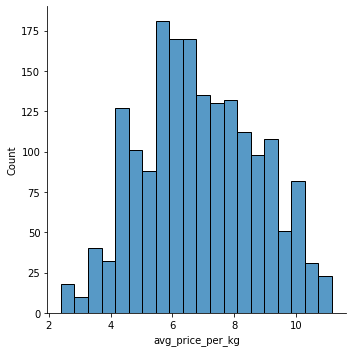

In [117]:
sns.displot(test['avg_price_per_kg'])

## 6.6 Processing Functions

To make the process reproduceable and easy to follow, all the cleaning steps are coded into functions. They are checked as the code flow to confirm everything works.

#### Read data again to make sure processing is repeatable.

In [118]:
df_train = pd.read_csv("data/df - train_set.csv")
df_test = pd.read_csv("data/df - test_set.csv", index_col=0)

In [119]:
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [120]:
# Filter for only apples.
def keep_golden(df):
    """
    Filter the dataframe on the Commodities column to only keep
    the APPLE GOLDEN DELICIOUS category.
    
    Parameters
    ----------
    df : DataFrame
        Input DataFrame
    Returns
    -------
    df: DataFrame
        Altered DataFrame with only APPLE GOLDEN DELICIOUS
        
    """
    df = df.copy()
    df = df[df["Commodities"] == "APPLE GOLDEN DELICIOUS"]
    df = df.drop(["Commodities"], axis=1)
    return df

In [121]:
df = keep_golden(df_train)

In [122]:
df.shape

(1952, 12)

In [123]:
# Change data type to datetime.
def dtype_to_datetime(df, column):
    """
    Conver the column data type format to datetime.
    
    
    Parameters
    ----------
    df : DataFrame
        Input DataFrame
    column : str
        Column to change data type
    Returns
    -------
    df: DataFrame
        Altered DataFrame with datetime format "Date" column
        
    """
    df = df.copy()
    df[column] = pd.to_datetime(df[column])
    return df

In [124]:
df = dtype_to_datetime(df, "Date")

In [125]:
# Split date options function.
def split_date(df, date_col):
    """
    Change the Date column values to different date format options.
    Can be day of week, month, year month, quarter and season.
    
    
    Parameters
    ----------
    df : DataFrame
        Input DataFrame
    date_col : str
        Column to change data type
    Returns
    -------
    df: DataFrame
        Altered DataFrame with different date formats
        
    """
    df["day_of_week"] = df[date_col].dt.day_name()
    df["month"] = df[date_col].dt.month_name()
    df["year_month"] = pd.PeriodIndex(df[date_col], freq='M').astype(str)
    df["quarter"] = pd.PeriodIndex(df[date_col], freq='Q').astype(str)
    df["season"] = df["month"].apply(lambda x: get_season(x))
    df = df.drop(["Date"], axis=1)
    return df

In [126]:
df = split_date(df, 'Date')

In [127]:
df.head()

,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,day_of_week,month,year_month,quarter,season
1,CAPE,M4183,1L,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,Wednesday,September,2020-09,2020Q3,spring
7,CAPE,JG110,2M,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,Tuesday,April,2020-04,2020Q2,spring
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,Thursday,April,2020-04,2020Q2,spring
40,CAPE,M4183,1S,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,Monday,May,2020-05,2020Q2,spring
69,EASTERN CAPE,IA400,1S,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,Monday,September,2020-09,2020Q3,spring


In [128]:
# Dummy variable function.
def dummy(df, columns):
    """
    Create dummy variables of the categorical features and
    dropping the first variable group value.
    
    
    Parameters
    ----------
    df : DataFrame
        Input DataFrame
    columns : list
        Columns to create dummy variables of
    Returns
    -------
    df: DataFrame
        Altered DataFrame with dummy variables
        
    """
    df = pd.get_dummies(df, prefix="dummy", prefix_sep="_", columns=columns, drop_first=True)
    df.columns = [col.replace(" ","_") for col in df.columns] 
    return df

In [129]:
# Call function to split Size_Grade into Size and Grade seperately.
df = split_sizegrade(df, "Size_Grade")

In [130]:
df.head()

,Province,Container,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,day_of_week,month,year_month,quarter,season,grade,size
1,CAPE,M4183,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,Wednesday,September,2020-09,2020Q3,spring,A,L
7,CAPE,JG110,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,Tuesday,April,2020-04,2020Q2,spring,B,M
24,W.CAPE-BERGRIVER ETC,JE090,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,Thursday,April,2020-04,2020Q2,spring,B,S
40,CAPE,M4183,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,Monday,May,2020-05,2020Q2,spring,A,S
69,EASTERN CAPE,IA400,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,Monday,September,2020-09,2020Q3,spring,A,S


In [131]:
df = dummy(df, ['Province','Container','grade', 'size', 'month', 'day_of_week', 'year_month', 'quarter', 'season'])

In [132]:
X = df.drop(['avg_price_per_kg'], axis=1)

In [133]:
X.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,dummy_EASTERN_CAPE,dummy_NATAL,dummy_ORANGE_FREE_STATE,dummy_TRANSVAAL,dummy_W.CAPE-BERGRIVER_ETC,dummy_WEST_COAST,dummy_DT063,dummy_EC120,dummy_EF120,dummy_EG140,dummy_IA400,dummy_JE090,dummy_JG110,dummy_M4183,dummy_M6125,dummy_M9125,dummy_B,dummy_M,dummy_S,dummy_U,dummy_X,dummy_August,dummy_December,dummy_February,dummy_January,dummy_July,dummy_June,dummy_March,dummy_May,dummy_October,dummy_September,dummy_Monday,dummy_Saturday,dummy_Thursday,dummy_Tuesday,dummy_Wednesday,dummy_2020-01,dummy_2020-02,dummy_2020-03,dummy_2020-04,dummy_2020-05,dummy_2020-06,dummy_2020-07,dummy_2020-08,dummy_2020-09,dummy_2020-10,dummy_2020Q1,dummy_2020Q2,dummy_2020Q3,dummy_2020Q4
1,18.3,150.0,170.0,51710.0,332,6075.6,822,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [134]:
# Scaling function.
def scaling(X):
    """
    Scale the values of DataFrame according to the
    Standardisation process.
    
    
    Parameters
    ----------
    X : DataFrame
        Input DataFrame
    Returns
    -------
    X: DataFrame
        Scaled DataFrame
    """    
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_standardise = pd.DataFrame(X_scaled, columns=X.columns)
    return X_standardise

In [135]:
new = scaling(X)

In [136]:
new.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,dummy_EASTERN_CAPE,dummy_NATAL,dummy_ORANGE_FREE_STATE,dummy_TRANSVAAL,dummy_W.CAPE-BERGRIVER_ETC,dummy_WEST_COAST,dummy_DT063,dummy_EC120,dummy_EF120,dummy_EG140,dummy_IA400,dummy_JE090,dummy_JG110,dummy_M4183,dummy_M6125,dummy_M9125,dummy_B,dummy_M,dummy_S,dummy_U,dummy_X,dummy_August,dummy_December,dummy_February,dummy_January,dummy_July,dummy_June,dummy_March,dummy_May,dummy_October,dummy_September,dummy_Monday,dummy_Saturday,dummy_Thursday,dummy_Tuesday,dummy_Wednesday,dummy_2020-01,dummy_2020-02,dummy_2020-03,dummy_2020-04,dummy_2020-05,dummy_2020-06,dummy_2020-07,dummy_2020-08,dummy_2020-09,dummy_2020-10,dummy_2020Q1,dummy_2020Q2,dummy_2020Q3,dummy_2020Q4
0,-0.222433,-0.065087,-0.105317,0.811807,0.510117,0.511073,0.571070,-0.343488,-0.245547,-0.068059,-0.088,-0.539449,-0.262685,-0.055527,-0.545777,-0.198503,-0.039233,-0.276891,-0.638243,-0.213372,1.523065,-0.071759,-0.039233,-0.750233,-0.627129,-0.869135,-0.099143,-0.335038,-0.377964,-0.181119,-0.295745,-0.270402,-0.537074,-0.284327,-0.378849,-0.292661,-0.124935,3.625593,-0.480384,-0.332194,-0.498879,-0.483613,1.875771,-0.270402,-0.295745,-0.378849,-0.343488,-0.292661,-0.284327,-0.537074,-0.377964,3.625593,-0.124935,-0.614458,-0.591550,1.176178,-0.124935
1,-0.295704,-0.332855,-0.382175,-0.103950,0.471248,0.091837,-0.563874,-0.343488,-0.245547,-0.068059,-0.088,-0.539449,-0.262685,-0.055527,-0.545777,-0.198503,-0.039233,-0.276891,-0.638243,4.686652,-0.656571,-0.071759,-0.039233,1.332918,1.594569,-0.869135,-0.099143,-0.335038,-0.377964,-0.181119,-0.295745,-0.270402,-0.537074,-0.284327,-0.378849,-0.292661,-0.124935,-0.275817,-0.480384,-0.332194,-0.498879,2.067771,-0.533114,-0.270402,-0.295745,-0.378849,2.911310,-0.292661,-0.284327,-0.537074,-0.377964,-0.275817,-0.124935,-0.614458,1.690476,-0.850212,-0.124935
2,-0.315779,-0.319467,-0.370639,-0.488870,-0.506948,-0.459029,1.515476,-0.343488,-0.245547,-0.068059,-0.088,1.853743,-0.262685,-0.055527,-0.545777,-0.198503,-0.039233,-0.276891,1.566802,-0.213372,-0.656571,-0.071759,-0.039233,1.332918,-0.627129,1.150569,-0.099143,-0.335038,-0.377964,-0.181119,-0.295745,-0.270402,-0.537074,-0.284327,-0.378849,-0.292661,-0.124935,-0.275817,-0.480384,-0.332194,2.004494,-0.483613,-0.533114,-0.270402,-0.295745,-0.378849,2.911310,-0.292661,-0.284327,-0.537074,-0.377964,-0.275817,-0.124935,-0.614458,1.690476,-0.850212,-0.124935
3,-0.222433,-0.252525,-0.220674,0.306871,0.691504,0.679187,0.047781,-0.343488,-0.245547,-0.068059,-0.088,-0.539449,-0.262685,-0.055527,-0.545777,-0.198503,-0.039233,-0.276891,-0.638243,-0.213372,1.523065,-0.071759,-0.039233,-0.750233,-0.627129,1.150569,-0.099143,-0.335038,-0.377964,-0.181119,-0.295745,-0.270402,-0.537074,-0.284327,-0.378849,3.416917,-0.124935,-0.275817,2.081666,-0.332194,-0.498879,-0.483613,-0.533114,-0.270402,-0.295745,-0.378849,-0.343488,3.416917,-0.284327,-0.537074,-0.377964,-0.275817,-0.124935,-0.614458,1.690476,-0.850212,-0.124935
4,3.608756,4.353082,3.655338,-0.468098,-0.562012,-0.419986,-0.561112,2.911310,-0.245547,-0.068059,-0.088,-0.539449,-0.262685,-0.055527,-0.545777,-0.198503,-0.039233,3.611532,-0.638243,-0.213372,-0.656571,-0.071759,-0.039233,-0.750233,-0.627129,1.150569,-0.099143,-0.335038,-0.377964,-0.181119,-0.295745,-0.270402,-0.537074,-0.284327,-0.378849,-0.292661,-0.124935,3.625593,2.081666,-0.332194,-0.498879,-0.483613,-0.533114,-0.270402,-0.295745,-0.378849,-0.343488,-0.292661,-0.284327,-0.537074,-0.377964,3.625593,-0.124935,-0.614458,-0.591550,1.176178,-0.124935


In [137]:
new.shape

(1952, 57)

# 7. Modelling

Several models will be trained on the training data. The models differ in types and also the preprocessing steps taken before training the models. This includes some variable selection process and feature engineering to obtain the best model for prediction.

In [138]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [139]:
df_train = pd.read_csv("data/df - train_set.csv")
df_test = pd.read_csv("data/df - test_set.csv", index_col=0)

In [140]:
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [141]:
categorical_cols = ["Province", "Container", "Size_Grade"]
numerical_cols = ["Weight_Kg", "Low_Price", "High_Price", "Sales_Total", "Total_Qty_Sold", "Total_Kg_Sold", "Stock_On_Hand"]
date_cols = ["Date"]
label = ["avg_price_per_kg"]

## 7.1 Model 1: Linear Regression Basic

This is the benchmark model which only contains numerical column variables.

In [142]:
# Processing
df = keep_golden(df_train)
X = df[numerical_cols]
y = df["avg_price_per_kg"]

In [143]:
model = LinearRegression()

In [144]:
# Train test split fucntion to split the training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [145]:
model.fit(X_train, y_train)

LinearRegression()

In [146]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### Evaluate Trained Model

In [147]:
beta_0 = float(model.intercept_)
beta_js = pd.DataFrame(model.coef_.T, X.columns, columns = ["Coefficient"])

In [148]:
print("Intercept:\t", beta_0)
print("\n", beta_js)

Intercept:	 6.82992620420897

                 Coefficient
Weight_Kg         -0.019977
Low_Price          0.000472
High_Price         0.003023
Sales_Total        0.000114
Total_Qty_Sold    -0.003455
Total_Kg_Sold     -0.000583
Stock_On_Hand      0.000098


In [149]:
# Plot fucntion for evaluation of model.
def pred_vs_act(y_test,y_test_pred):
    """
    Predicted values against the actual values.
    Vertical distance shows how far away the predicted value is from the actual value.
    
    
    Parameters
    ----------
    y_test : Pandas Series
        Actual response variable values
    y_test_pred: Pandas Series
        Model predicted response variable values
    Returns
    -------
    Scatter plot and Line Plot
        Graph
    """  
    # Create figure and axes
    f, ax = plt.subplots(figsize=(6, 6)) 

    # Plot on axes
    ax.set_title("Predicted vs Actual")
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")
    ax.scatter(y_test, y_test_pred)
    ax.plot(y_test, y_test, "r")
    plt.show()

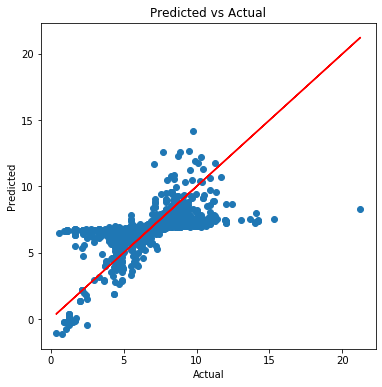

In [150]:
pred_vs_act(y_train, y_train_pred)

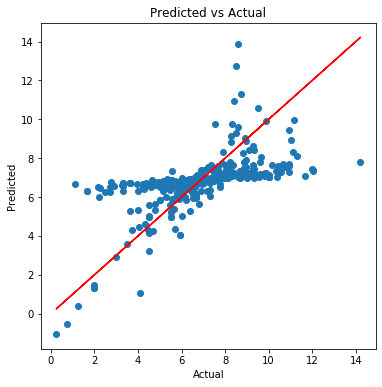

In [151]:
pred_vs_act(y_test, y_test_pred)

In [152]:
#Plot function of the errors
def error_plt(y_actual, y_model_predict):
    """
    Plot histogram count of the error values for the model
    predicted values and actual values.
    
    
    Parameters
    ----------
    y_test : Pandas Series
        Actual response variable values
    y_test_pred: Pandas Series
        Model predicted response variable values
    Returns
    -------
    Histogram plot
        Graph
    """
    # Create figure and axes
    f, ax = plt.subplots(figsize=(6, 4)) 
    errors = np.array(y_actual) - np.array(y_model_predict)
    
    errors = np.round(errors, 2)
    plt.hist(errors)
    ax.set_title("Histogram of the prediction errors")
    ax.set_xlabel("Error")
    ax.set_ylabel("Count")
    plt.show()

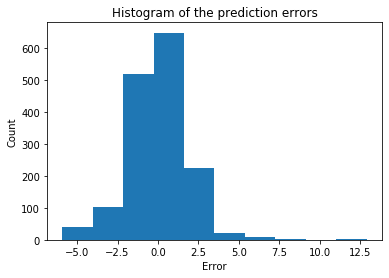

In [153]:
error_plt(y_train, y_train_pred)

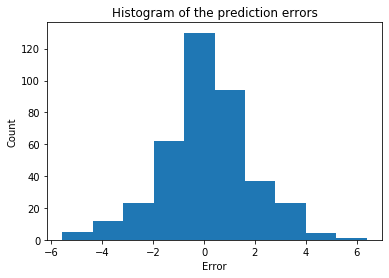

In [154]:
error_plt(y_test, y_test_pred)

In addition to having some large errors, we can also see that most of the errors are positive numbers. Ideally, we want our errors to be evenly distributed either side of zero - we want our line to best fit the data, i.e. no bias.
   
We can measure the overall error of the fit by calculating the **Residual Sum of Squares**:
   
$$RSS = \sum_{i=1}^n(y_i-\hat{y}_i)^2$$

The RSS finds the difference between the y-value of each data point and our estimated line (which may be either negative or positive), squares the difference, and then adds all the differences up. In other words, it's the sum of the squares of all the errors we calculated before.

In [155]:
print("Residual sum of squares:", (np.array(y_test - y_test_pred) ** 2).sum())

Residual sum of squares: 1155.4208150221407


The other measuring metric used is the RMSE value which is the root of the MSE value. The MSE value is the RSS divided by the number of observations.

In [156]:
train_rmse = (metrics.mean_squared_error(y_train, y_train_pred))**0.5
train_rmse

1.8029960581006492

In [157]:
test_rmse = (metrics.mean_squared_error(y_test, y_test_pred))**0.5
test_rmse

1.7190231085203476

Here we can see our RSS value. It also shows the RMSE training value and that it has a lower test RMSE value - which indicates the model predicts well . for unseen data. Furthermore, if we calculate the sum of the errors we find that the value is close to 0. <br>Other preprocessing steps and models will be considered to improve on the scores and this process is repeated.

### First Kaggle submission

In [158]:
# Submit preprocessing steps
df = keep_golden(df_test)
X = df[numerical_cols]

In [159]:
model_submit_results = model.predict(X)

In [160]:
df_submit = df_test.reset_index()[["Index"]]
df_submit["avg_price_per_kg"] = model_submit_results

In [161]:
from datetime import datetime
now = datetime.now().strftime("%Y%m%d%H%M")
df_submit.to_csv(f"submissions/ae1_leon_{now}.csv", index=False)

## 7.2 Model 2: Linear Regression with Categorical Variables

Now the categorical data will also be included to train the model after the relevant processing steps.

In [162]:
# Processing
df = keep_golden(df_train)
df = dtype_to_datetime(df, "Date")
df = split_date(df, "Date")
df = dummy(df, ["Province","Container","Size_Grade", "month", "day_of_week", "year_month", "quarter", "season"])
y = df[["avg_price_per_kg"]]
X = df.drop("avg_price_per_kg", axis=1)
X = scaling(X)

In [163]:
# Train test split function to split the training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [164]:
model = LinearRegression()

In [165]:
model.fit(X_train, y_train)

LinearRegression()

In [166]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### Evaluate Trained Model

In [167]:
# Obtain coefficients for feature importance.
def get_feature_importances(model, X):
    """
    Extract the coefficients of each feature used in the model
    either from the array or the built in function feature_importances_
    from the models used.
    
    
    Parameters
    ----------
    model : model type
        The model used to train and predict
    X: Pandas DataFrame
        Processed DataFrame
    Returns
    -------
    feature_importance : Pandas DataFrame
        The coefficients of each feature
    """      
    
    feature_importance = pd.DataFrame()
    feature_importance["feature"] = X.columns
    try:
        feature_importance["coef"] = model.coef_[0]
    except:
        feature_importance["coef"] = model.feature_importances_
    feature_importance = feature_importance.sort_values('coef', ascending=False)
    return feature_importance

In [168]:
get_feature_importances(model, X)

,feature,coef
17,dummy_IA400,1.963110e+13
20,dummy_M4183,1.349694e+12
54,dummy_2020-08,9.781212e+11
59,dummy_2020Q3,8.488985e+11
14,dummy_EC120,7.277016e+11
40,dummy_October,5.553428e+11
18,dummy_JE090,5.231926e+11
37,dummy_June,3.577372e+11
38,dummy_March,3.516945e+11
15,dummy_EF120,3.304867e+11


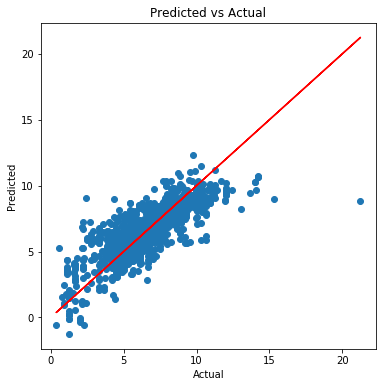

In [169]:
pred_vs_act(y_train, y_train_pred)

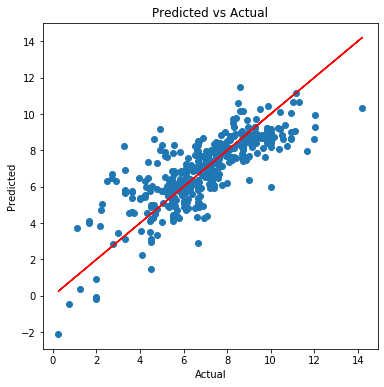

In [170]:
pred_vs_act(y_test, y_test_pred)

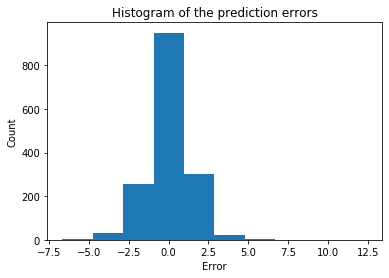

In [171]:
error_plt(y_train, y_train_pred)

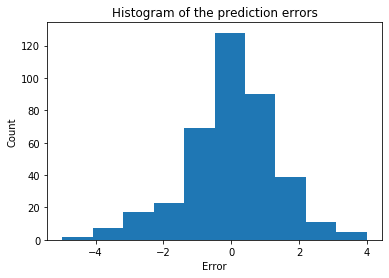

In [172]:
error_plt(y_test, y_test_pred)

In [173]:
print("Residual sum of squares:", (np.array(y_test - y_test_pred) ** 2).sum())

Residual sum of squares: 703.8034623085227


In [174]:
train_rmse = (metrics.mean_squared_error(y_train, y_train_pred))**0.5
train_rmse

1.3248592360733324

In [175]:
test_rmse = (metrics.mean_squared_error(y_test, y_test_pred))**0.5
test_rmse

1.3416440865628296

### Second Kaggle submission

In [176]:
# Processing
df = keep_golden(df_test)
df = dtype_to_datetime(df, "Date")
df = split_date(df, "Date")
df = dummy(df, ["Province","Container","Size_Grade", "month", "day_of_week", "year_month", "quarter", "season"])
X = scaling(df)

In [177]:
model_submit_results = model.predict(X)

In [178]:
df_submit = df_test.reset_index()[["Index"]]
df_submit["avg_price_per_kg"] = model_submit_results

In [179]:
now = datetime.now().strftime("%Y%m%d%H%M")
df_submit.to_csv(f"submissions/ae1_leon_{now}.csv", index=False)

## 7.3 Model 3: Linear Regression Manual Feature Selection

Select features to include in model based on multicolinearity, the correlation and those that might simplify the model. <br>
- Dropping the outliers

In [180]:
# Processing
df = keep_golden(df_train)
df = dtype_to_datetime(df, "Date")
df = split_date(df, "Date")
df = df.drop(["day_of_week", "month", "year_month", "season"], axis=1)
df = split_sizegrade(df, "Size_Grade")
df = num_to_cat(df, "Weight_Kg")
df = drop_outlier_sd(df, "avg_price_per_kg", 99)
df = dummy(df, ["Province", "Container", "Weight_Kg", "quarter", "grade", "size"])
y = df[["avg_price_per_kg"]]
X = df.drop("avg_price_per_kg", axis=1)
X = scaling(X)

Dropped 53 rows.


In [181]:
# Train test split fucntion to split the training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [182]:
model = LinearRegression()

In [183]:
model.fit(X_train, y_train)

LinearRegression()

In [184]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### Evaluate Trained Model

In [185]:
beta_0 = float(model.intercept_)
print("Intercept:\t", beta_0)

Intercept:	 6.814774937381707


In [186]:
get_feature_importances(model, X)

,feature,coef
24,dummy_Weight_Kg_14.0,3.978739e+13
23,dummy_Weight_Kg_12.5,2.118783e+12
13,dummy_EC120,2.025591e+12
17,dummy_JE090,1.506819e+12
25,dummy_Weight_Kg_18.3,1.168574e+12
14,dummy_EF120,9.246955e+11
12,dummy_DT063,9.019360e+11
16,dummy_IA400,8.936199e+11
18,dummy_JG110,6.831051e+11
26,dummy_Weight_Kg_3.0,4.209969e+11


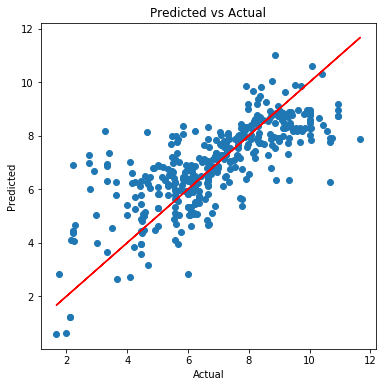

In [187]:
pred_vs_act(y_test, y_test_pred)

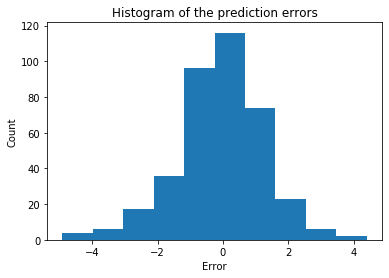

In [188]:
error_plt(y_test, y_test_pred)

In [189]:
print("Residual sum of squares:", (np.array(y_test - y_test_pred) ** 2).sum())

Residual sum of squares: 684.7071062822808


In [190]:
train_rmse = (metrics.mean_squared_error(y_train, y_train_pred))**0.5
train_rmse

1.2351573478005544

In [191]:
test_rmse = (metrics.mean_squared_error(y_test, y_test_pred))**0.5
test_rmse

1.342334088819174

### Third Kaggle submission

In [192]:
# Submit preprocessing steps
df = keep_golden(df_test)
df = dtype_to_datetime(df, "Date")
df = split_date(df, "Date")
df = df.drop(["day_of_week", "month", "year_month", "season"], axis=1)
df = split_sizegrade(df, "Size_Grade")
df = num_to_cat(df, "Weight_Kg")
df = dummy(df, ["Province", "Container", "Weight_Kg", "quarter", "grade", "size"])
X = scaling(df)

In [193]:
model_submit_results = model.predict(X)

In [194]:
df_submit = df_test.reset_index()[["Index"]]
df_submit["avg_price_per_kg"] = model_submit_results

In [195]:
now = datetime.now().strftime("%Y%m%d%H%M")
df_submit.to_csv(f"submissions/ae1_leon_{now}.csv", index=False)

## 7.4 Model 4: Ridge

Because we standardised the features, we can compare coefficients to each other, since their respective variables are all on the same scale. We can interpret the intercepts as the expected average price per kg when all the features are equal to their respective means and the coefficients are interpreted as the expected change in average price per kg given an increase of 1 in the scaled feature value.

We try to minimise the RSS to improve overall fit of model and now to penalise individual coefficients that get too large - those that contiruibute the most to reducing the fit. Penalty term - the alpha - reduce/shrink the coefficients values close to zero.

In [196]:
# Preprocessing
df = keep_golden(df_train)
df = dtype_to_datetime(df, "Date")
df = split_date(df, "Date")
df = df.drop(["day_of_week", "month", "year_month", "quarter"], axis=1)
df = split_sizegrade(df, "Size_Grade")
df = num_to_cat(df, "Weight_Kg")
df = drop_outlier_sd(df, "avg_price_per_kg", 98)
df = dummy(df, ["Province", "Container", "Weight_Kg", "season", "grade", "size"])
y = df[["avg_price_per_kg"]]
X = df.drop("avg_price_per_kg", axis=1)
X = scaling(X)

Dropped 90 rows.


In [197]:
model = Ridge(alpha=10)

In [198]:
# Train test split fucntion to split the training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [199]:
model.fit(X_train, y_train)

Ridge(alpha=10)

In [200]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### Evaluate Trained Model

In [201]:
get_feature_importances(model, X)

,feature,coef
2,Sales_Total,2.070916
1,High_Price,0.795067
0,Low_Price,0.534561
22,dummy_Weight_Kg_12.0,0.234068
13,dummy_EC120,0.187895
10,dummy_W.CAPE-BERGRIVER_ETC,0.146230
14,dummy_EF120,0.127043
29,dummy_Weight_Kg_9.0,0.117968
17,dummy_JE090,0.117968
12,dummy_DT063,0.088921


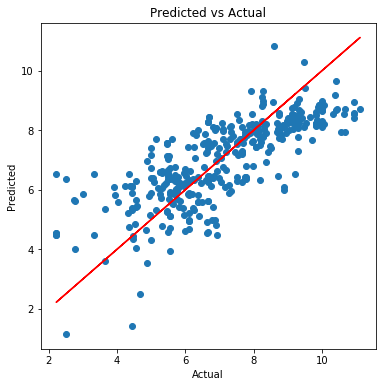

In [202]:
pred_vs_act(y_test, y_test_pred)

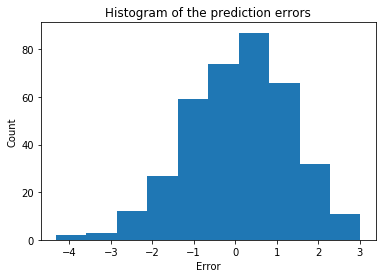

In [203]:
error_plt(y_test, y_test_pred)

In [204]:
print("Residual sum of squares:", (np.array(y_test - y_test_pred) ** 2).sum())

Residual sum of squares: 571.0749765524221


In [205]:
train_rmse = (metrics.mean_squared_error(y_train, y_train_pred))**0.5
train_rmse

1.2494942646388427

In [206]:
test_rmse = (metrics.mean_squared_error(y_test, y_test_pred))**0.5
test_rmse

1.2373488225717233

### Fourth Kaggle submission

In [207]:
# Submit preprocessing steps
df = keep_golden(df_test)
df = dtype_to_datetime(df, "Date")
df = split_date(df, "Date")
df = df.drop(["day_of_week", "month", "year_month", "quarter"], axis=1)
df = split_sizegrade(df, "Size_Grade")
df = num_to_cat(df, "Weight_Kg")
df = dummy(df, ["Province", "Container", "Weight_Kg", "season", "grade", "size"])
X = scaling(df)

In [208]:
model_submit_results = model.predict(X)

In [209]:
df_submit = df_test.reset_index()[["Index"]]
df_submit["avg_price_per_kg"] = model_submit_results

In [210]:
now = datetime.now().strftime("%Y%m%d%H%M")
df_submit.to_csv(f"submissions/ae1_leon_{now}.csv", index=False)

## 7.5 Model 5: Lasso

In [211]:
# Preprocessing
df = keep_golden(df_train)
df = dtype_to_datetime(df, 'Date')
df = split_date(df, 'Date')
df = df.drop(['day_of_week', 'month', 'year_month', 'quarter'], axis=1)
df = split_sizegrade(df, 'Size_Grade')
df = num_to_cat(df, 'Weight_Kg')
df = drop_outlier_sd(df, "avg_price_per_kg", 98)
df = dummy(df, ["Province", "Container", "Weight_Kg", "season", "grade", "size"])
y = df[['avg_price_per_kg']]
X = df.drop('avg_price_per_kg', axis=1)
X = scaling(X)

Dropped 90 rows.


In [212]:
model = Lasso(alpha=0.01)

In [213]:
# Train test split fucntion to split the training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [214]:
model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [215]:
y_train_pred = model.predict(X_train).reshape(-1,1)
y_test_pred = model.predict(X_test).reshape(-1,1)

### Evaluate Trained Model

In [216]:
get_feature_importances(model, X)

,feature,coef
0,Low_Price,0.429904
26,dummy_Weight_Kg_3.0,0.429904
20,dummy_M6125,0.429904
21,dummy_M9125,0.429904
22,dummy_Weight_Kg_12.0,0.429904
23,dummy_Weight_Kg_12.5,0.429904
24,dummy_Weight_Kg_14.0,0.429904
25,dummy_Weight_Kg_18.3,0.429904
27,dummy_Weight_Kg_400.0,0.429904
18,dummy_JG110,0.429904


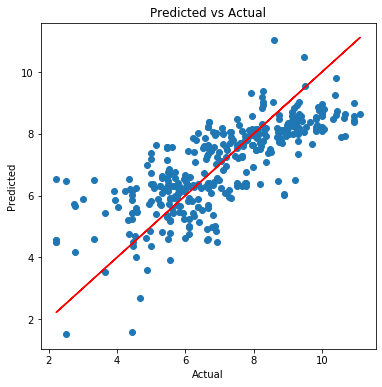

In [217]:
pred_vs_act(y_test, y_test_pred)

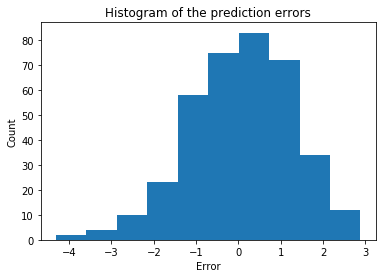

In [218]:
error_plt(y_test, y_test_pred)

In [219]:
print("Residual sum of squares:", (np.array(y_test - y_test_pred) ** 2).sum())

Residual sum of squares: 569.0922610894048


In [220]:
train_rmse = (metrics.mean_squared_error(y_train, y_train_pred))**0.5
train_rmse

1.2503926440816724

In [221]:
test_rmse = (metrics.mean_squared_error(y_test, y_test_pred))**0.5
test_rmse

1.2351989789770572

### Fith Kaggle submission

In [222]:
# Submit preprocessing steps
df = keep_golden(df_test)
df = dtype_to_datetime(df, "Date")
df = split_date(df, "Date")
df = df.drop(["day_of_week", "month", "year_month", "quarter"], axis=1)
df = split_sizegrade(df, "Size_Grade")
df = num_to_cat(df, "Weight_Kg")
df = dummy(df, ["Province", "Container", "Weight_Kg", "season", "grade", "size"])
X = scaling(df)

In [223]:
model_submit_results = model.predict(X)

In [224]:
df_submit = df_test.reset_index()[["Index"]]
df_submit["avg_price_per_kg"] = model_submit_results

In [225]:
now = datetime.now().strftime("%Y%m%d%H%M")
df_submit.to_csv(f"submissions/ae1_leon_{now}.csv", index=False)

## 7.6 Model 6: Random Forest

In [226]:
# Preprocessing
df = keep_golden(df_train)
df = dtype_to_datetime(df, 'Date')
df = split_date(df, 'Date')
df = df.drop(['day_of_week', 'month', 'year_month', 'quarter'], axis=1)
df = split_sizegrade(df, 'Size_Grade')
df = num_to_cat(df, 'Weight_Kg')
df = drop_outlier_sd(df, "avg_price_per_kg", 98)
df = dummy(df, ["Province", "Container", "Weight_Kg", "season", "grade", "size"])
y = df[['avg_price_per_kg']]
X = df.drop('avg_price_per_kg', axis=1)
X = scaling(X)

Dropped 90 rows.


In [227]:
model = RandomForestRegressor()

In [228]:
# Train test split fucntion to split the training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [229]:
model.fit(X_train, y_train)

C:\Users\leon1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [230]:
y_train_pred = model.predict(X_train).reshape(-1,1)
y_test_pred = model.predict(X_test).reshape(-1,1)

### Evaluate Trained Model

In [231]:
get_feature_importances(model, X)

,feature,coef
0,Low_Price,0.425429
1,High_Price,0.298458
27,dummy_Weight_Kg_400.0,0.064954
16,dummy_IA400,0.056431
2,Sales_Total,0.027304
19,dummy_M4183,0.022400
5,Stock_On_Hand,0.016499
25,dummy_Weight_Kg_18.3,0.014430
22,dummy_Weight_Kg_12.0,0.013160
4,Total_Kg_Sold,0.010444


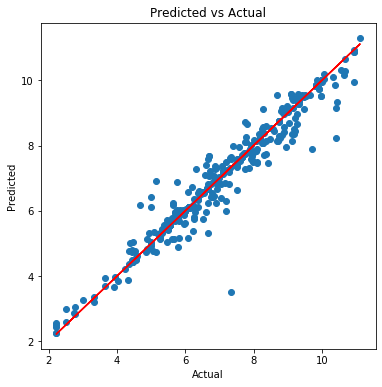

In [232]:
pred_vs_act(y_test, y_test_pred)

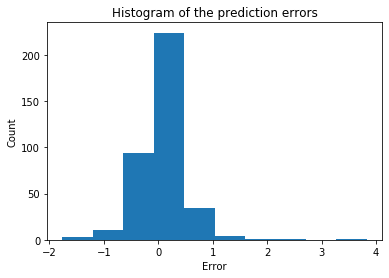

In [233]:
error_plt(y_test, y_test_pred)

In [234]:
print("Residual sum of squares:", (np.array(y_test - y_test_pred) ** 2).sum())

Residual sum of squares: 77.73256108999996


In [235]:
train_rmse = (metrics.mean_squared_error(y_train, y_train_pred))**0.5
train_rmse

0.1980143001802895

In [236]:
test_rmse = (metrics.mean_squared_error(y_test, y_test_pred))**0.5
test_rmse

0.45650661233388234

### Sixth Kaggle submission

In [237]:
# Submit preprocessing steps
df = keep_golden(df_test)
df = dtype_to_datetime(df, 'Date')
df = split_date(df, 'Date')
df = df.drop(['day_of_week', 'month', 'year_month', 'quarter'], axis=1)
df = split_sizegrade(df, 'Size_Grade')
df = num_to_cat(df, 'Weight_Kg')
df = dummy(df, ["Province", "Container", "Weight_Kg", "season", "grade", "size"])
X = df

In [238]:
model_submit_results = model.predict(X)

In [239]:
df_submit = df_test.reset_index()[["Index"]]
df_submit["avg_price_per_kg"] = model_submit_results

In [240]:
now = datetime.now().strftime("%Y%m%d%H%M")
df_submit.to_csv(f"submissions/ae1_leon_{now}.csv", index=False)

## 7.7 Model 7: XGBoost

In [241]:
# Preprocessing
df = keep_golden(df_train)
df = dtype_to_datetime(df, 'Date')
df = split_date(df, 'Date')
df = df.drop(['day_of_week', 'month', 'year_month', 'quarter'], axis=1)
df = split_sizegrade(df, 'Size_Grade')
df = num_to_cat(df, 'Weight_Kg')
df = drop_outlier_sd(df, "avg_price_per_kg", 98)
df = dummy(df, ["Province", "Container", "Weight_Kg", "season", "grade", "size"])
y = df[['avg_price_per_kg']]
X = df.drop('avg_price_per_kg', axis=1)
X = scaling(X)

Dropped 90 rows.


In [242]:
model = GradientBoostingRegressor()

In [243]:
# Train test split fucntion to split the training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [244]:
model.fit(X_train, y_train)

C:\Users\leon1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor()

In [245]:
y_train_pred = model.predict(X_train).reshape(-1,1)
y_test_pred = model.predict(X_test).reshape(-1,1)

### Evaluate Trained Model

In [246]:
get_feature_importances(model, X)

,feature,coef
0,Low_Price,0.463278
1,High_Price,0.288027
16,dummy_IA400,0.053815
22,dummy_Weight_Kg_12.0,0.044777
27,dummy_Weight_Kg_400.0,0.039952
2,Sales_Total,0.026829
32,dummy_S,0.016571
25,dummy_Weight_Kg_18.3,0.013408
19,dummy_M4183,0.011546
17,dummy_JE090,0.009170


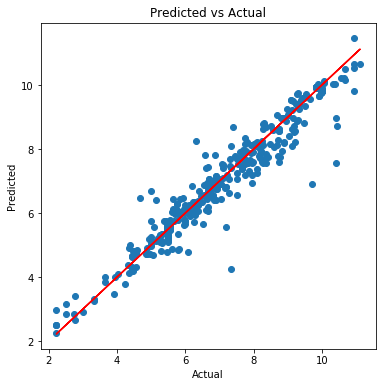

In [247]:
pred_vs_act(y_test, y_test_pred)

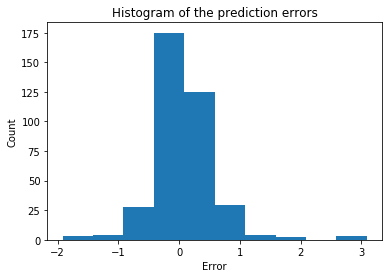

In [248]:
error_plt(y_test, y_test_pred)

In [249]:
print("Residual sum of squares:", (np.array(y_test - y_test_pred) ** 2).sum())

Residual sum of squares: 97.71129037601781


In [250]:
train_rmse = (metrics.mean_squared_error(y_train, y_train_pred))**0.5
train_rmse

0.44455139594528953

In [251]:
test_rmse = (metrics.mean_squared_error(y_test, y_test_pred))**0.5
test_rmse

0.5118208319429481

### Seventh Kaggle submission

In [252]:
# Submit preprocessing steps
df = keep_golden(df_test)
df = dtype_to_datetime(df, 'Date')
df = split_date(df, 'Date')
df = df.drop(['day_of_week', 'month', 'year_month', 'quarter'], axis=1)
df = split_sizegrade(df, 'Size_Grade')
df = num_to_cat(df, 'Weight_Kg')
df = dummy(df, ["Province", "Container", "Weight_Kg", "season", "grade", "size"])
X = df

In [253]:
model_submit_results = model.predict(X)

In [254]:
df_submit = df_test.reset_index()[["Index"]]
df_submit["avg_price_per_kg"] = model_submit_results

In [255]:
now = datetime.now().strftime("%Y%m%d%H%M")
df_submit.to_csv(f"submissions/ae1_leon_{now}.csv", index=False)

# 8. Results for Submission / Deploy Model

### Model for API

In [256]:
keep = ["Weight_Kg", "Low_Price", "High_Price", "Sales_Total", "Total_Qty_Sold", "Total_Kg_Sold", "Stock_On_Hand"]

In [257]:
df = keep_golden(df_train)
y = df[['avg_price_per_kg']]
df = df[keep]
X = scaling(df)

In [258]:
model = RandomForestRegressor()

In [259]:
model.fit(X, y)

C:\Users\leon1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [260]:
import pickle

# model_save_path = "models/model_ridge.pkl"
model_save_path = "models/model_randf.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(model, file)

# 9. Conclusion

- Very small dataset (<2000 observations).
- Dependent variable is avg price/kg of apples.
- No missing data.
- Categorical and numerical data present.
- Numerical data includes high/low price, sales, qty, weight.
- Categorical data includes Province, Container, Size_Grade.
- High and low price both have strong linear correlations with dependent variable.
- Other numeric columns do not have strong linear relationship with dependent variable.
- Basic linear model with only numeric columns improves if categorical dummy columns are added.
- Ridge and Lasso models perform slightly better than basic linear by shrinking the coefficients of less important independent variables.
- Random forest model performs the best.
- Gradient boost model performs second best.
- Feature engineering is still required to establish the relationship between container, province and size_grade relative to the numeric columns (high and low price, weight)

# 10. References

EDSA tutorial notebooks and learning material.